The purpose of this notebook is to evaluate GPDs $G_q(x,\eta,t)$ as well as their conformal moments $\mathbb{G}_q(n,\eta,t)$, where, for a generic GPD, we have its conformal moment expansion
\begin{equation}
G_q(x,\eta,t)=\sum_{n=0}^\infty (-1)^{n}p_n(x,\eta)\mathbb{F}_q(n,\eta,t),\qquad G_g(x,\eta,t)=\sum_{n=1}^\infty (-1)^{n-1}\, {^g\!p}_n(x,\eta) \mathbb{G}_g(n,\eta,t),
\end{equation}
where $G=H,E,\widetilde{H},\widetilde{E},H^T,E^T,\widetilde{H}^T,\widetilde{E}^T$.

To this end, we import the MSTW PDF parametrization of PDFs. The conformal moments are obtained by Reggeized $x$ integrals over PDFs at some input scale $\mu_0=1$ GeV and evolved using the pertinent RGEs. THe GPDs are reconstructed using the expansion in conformal partial waves and pertinent Mellin-Barnes integrals to resum their expansion in conformal moments.

In [1]:
# Import necessary libraries and set display options
import numpy as np
# import mpmath as mp
# import matplotlib.pyplot as plt
# from scipy.integrate import quad, trapezoid
# from joblib import Parallel, delayed
# from scipy.special import gamma, digamma

# import time
# import re
# import os

# from mstw_pdf import (
#     plot_uv_minus_dv_pdf, 
#     plot_uv_plus_dv_plus_S_pdf,
#     plot_gluon_pdf
# )

# from aac_pdf import(
#     plot_polarized_uv_minus_dv_pdf,
#     plot_polarized_uv_plus_dv_plus_S_pdf,
#     plot_polarized_gluon_pdf
#     )

from stringy_gpds import (
    plot_gpds,plot_gpd_data,
    plot_moments_on_grid,plot_moment,
    evolve_conformal_moment,first_singlet_moment,
    evolve_singlet_D,gluon_helicity,
    quark_helicity, spin_orbit_corelation, total_spin,
    orbital_angular_momentum,
    plot_fourier_transform_singlet_helicity,
    plot_fourier_transform_quark_helicity,
    plot_fourier_transform_quark_spin_orbit_correlation,
    plot_fourier_transform_singlet_spin_orbit_correlation,
    plot_fourier_transform_quark_orbital_angular_momentum,
    plot_fourier_transform_transverse_moments,
    plot_spin_orbit_correlation
)
# Set display options
np.set_printoptions(linewidth=200)

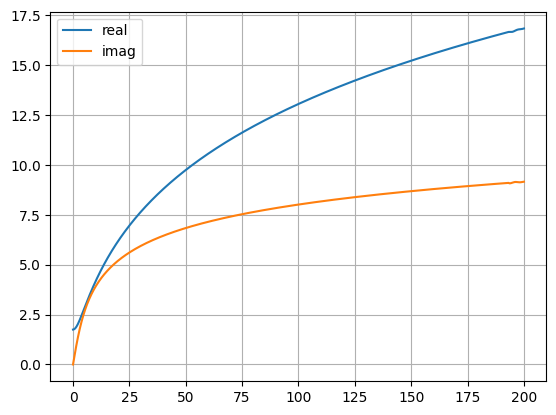

In [2]:
from stringy_gpds import gamma_qq, gamma_qg, gamma_gq, gamma_gg, harmonic_number, nested_harmonic_number
import matplotlib.pyplot as plt
import numpy as np

from joblib import Parallel, delayed

k_vals = np.linspace(0,200,1000)
j = 2 + 1j * k_vals
vals = Parallel(n_jobs=-1)(
                delayed(lambda x_: complex(gamma_qq(x_, moment_type="non_singlet_isovector",
                                                    evolve_type="vector", evolution_order="NLO")))(x) for x in j)
# vals = Parallel(n_jobs=-1)(
#                 delayed(lambda x_: complex(harmonic_number(1,x_)))(x) for x in j)
vals = Parallel(n_jobs=-1)(
                delayed(lambda x_: complex(nested_harmonic_number([1,2],x_)))(x) for x in j)
vals_re = np.real(vals)
vals_im = np.imag(vals)

plt.plot(k_vals,vals_re,label="real")
plt.plot(k_vals,vals_im,label="imag")
plt.legend(fontsize=10, markerscale=1.5)
plt.grid()
plt.show()

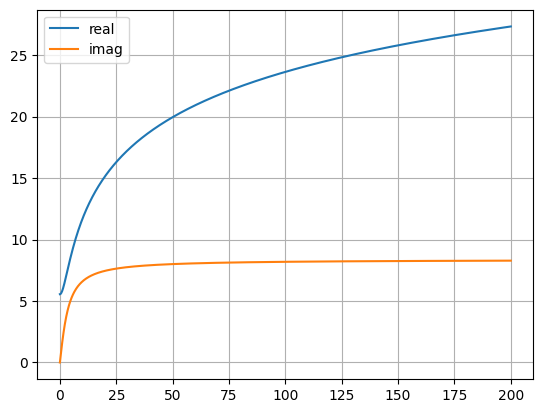

In [26]:
k_vals = np.linspace(0,200,1000)
j = 2 + 1j * k_vals
vals = Parallel(n_jobs=-1)(
                delayed(lambda x_: complex(gamma_qq(x_, moment_type="non_singlet_isovector",
                                                    evolve_type="vector", evolution_order="LO")))(x) for x in j)
vals_re = np.real(vals)
vals_im = np.imag(vals)

plt.plot(k_vals,vals_re,label="real")
plt.plot(k_vals,vals_im,label="imag")
plt.legend(fontsize=10, markerscale=1.5)
plt.grid()
plt.show()

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 1)): 0.032774 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/singlet_gluon_GPD_Htilde.pdf


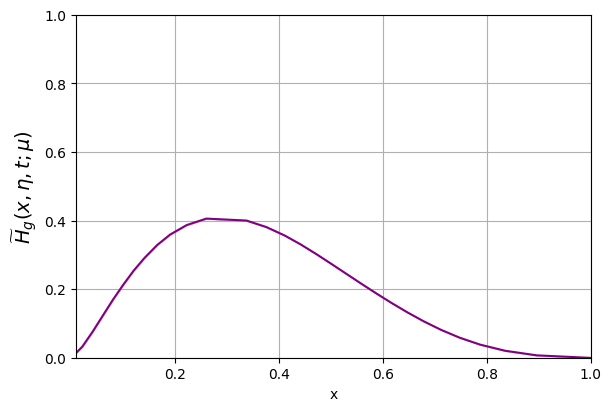

In [5]:
from stringy_gpds import plot_gpds
eta_array = [1e-3]
t_array = [-1e-3]
mu_array = [1]
colors = ["purple"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="gluon",gpd_type="singlet",gpd_label="Htilde",read_from_file=True, write_to_file=False,y_0=0,y_1=1,plot_legend=False)

In [2]:
from mstw_pdf import uv_plus_dv_plus_S_pdf, uv_minus_dv_pdf, gluon_pdf
from aac_pdf import polarized_uv_minus_dv_pdf, polarized_uv_plus_dv_plus_S_pdf, polarized_gluon_pdf
print(uv_minus_dv_pdf(.2,evolution_order="NLO"))
print(uv_plus_dv_plus_S_pdf(.2,evolution_order="NLO"))
print(.2 * gluon_pdf(.2,evolution_order="NLO"))
print(polarized_uv_minus_dv_pdf(.2,evolution_order="NLO"))
print(polarized_uv_plus_dv_plus_S_pdf(.2,evolution_order="NLO"))
print(.2 * polarized_gluon_pdf(.2,evolution_order="NLO"))

1.9017602372430111
6.826326905309316
0.7365893878506559
2.2695117263234095
0.8339188958070582
0.14109564628732427


In [ ]:
from joblib import Memory
import time
import numpy as np

location = "/mnt/c/Users/flori/Documents/PostDoc/Jupyter/Python/cache"
memory = Memory(location, verbose=0)

# def costly_compute(data, column_index=0):
#     """Simulate an expensive computation"""
#     time.sleep(5)
#     return data[column_index]

rng = np.random.RandomState(42)
data = rng.randn(int(1e5), 10)
# start = time.time()
# data_trans = costly_compute(data)
# end = time.time()

# print("\nThe function took {:.2f} s to compute.".format(end - start))
# print("\nThe transformed data are:\n {}".format(data_trans))

def costly_compute_cached(data, column_index=0):
    """Simulate an expensive computation"""
    time.sleep(5)
    return data[column_index]


costly_compute_cached = memory.cache(costly_compute_cached)
start = time.time()
data_trans = costly_compute_cached(data)
end = time.time()

print("\nThe function took {:.2f} s to compute.".format(end - start))
print("\nThe transformed data are:\n {}".format(data_trans))

memory.clear(warn=False)


The function took 5.07 s to compute.

The transformed data are:
 [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


In [1]:
from stringy_gpds import harmonic_number
import time

In [2]:
start_time = time.time()
harmonic_number(1,2-3j)
end_time = time.time()
print(end_time - start_time)
start_time = time.time()
harmonic_number(1,2-20j)
end_time = time.time()
print(end_time - start_time)

0.7143568992614746
0.00015616416931152344


In [1]:
from stringy_gpds import generate_harmonic_table
generate_harmonic_table(1)
generate_harmonic_table(2)
generate_harmonic_table(3)
generate_harmonic_table(-2)
generate_harmonic_table(-3)
generate_harmonic_table([1,1])
generate_harmonic_table([1,1,1])

100%|████████████████████████████████████████████████████████████████████████| 111201/111201 [00:06<00:00, 18217.76it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/harmonic_m1_1.csv


100%|████████████████████████████████████████████████████████████████████████| 111201/111201 [00:04<00:00, 26090.76it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/harmonic_m1_2.csv


100%|████████████████████████████████████████████████████████████████████████| 111201/111201 [00:04<00:00, 24878.62it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/harmonic_m1_3.csv


100%|████████████████████████████████████████████████████████████████████████| 111201/111201 [00:07<00:00, 15054.67it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/harmonic_m1_-2.csv


100%|████████████████████████████████████████████████████████████████████████| 111201/111201 [00:07<00:00, 14018.86it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/harmonic_m1_-3.csv


100%|████████████████████████████████████████████████████████████████████████| 111201/111201 [00:06<00:00, 17369.16it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/nested_harmonic_m1_1_m2_1.csv


100%|█████████████████████████████████████████████████████████████████████████| 111201/111201 [00:12<00:00, 8821.62it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/nested_harmonic_m1_1_m2_1_m3_1.csv


In [5]:
from stringy_gpds import harmonic_number, nested_harmonic_number
harmonic_number(1,2-100j)
harmonic_number(2,2-100j)
harmonic_number(3,2-100j)
harmonic_number(-2,2-100j)
harmonic_number(-3,2-100j)
nested_harmonic_number([1,1],2-100j)
nested_harmonic_number([1,1,1],2-100j)

(21.6642389043056-21.4417719467828j)

In [5]:
from stringy_gpds import harmonic_number, nested_harmonic_number
nested_harmonic_number([1,2],2-20j)

(4.694546831301809-2.330176789428204j)

In [4]:
from helpers import harmonic_interpolator
def check_cache(indices):
    if harmonic_interpolator.check_call_in_cache(indices):
        print(f"Interpolator for indices={indices} is already cached")
    else:
        print(f"Interpolator for indices={indices} is NOT cached")
check_cache((1,2))

Interpolator for indices=(1, 2) is already cached


In [2]:
from config import memory
memory.clear()

[Memory(location=/mnt/c/Users/flori/Documents/PostDoc/Jupyter/Python/cache/joblib)]: Flushing completely the cache


In [ ]:
from stringy_gpds import generate_harmonic_table
generate_harmonic_table(2)
generate_harmonic_table(3)
generate_harmonic_table(-1)

100%|████████████████████████████████████████████████████████████████████████| 111201/111201 [00:05<00:00, 18623.97it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/harmonic_l_1.csv


In [1]:
from stringy_gpds import generate_anomalous_dimension_table
generate_anomalous_dimension_table("qq",moment_type="non_singlet_isovector",evolve_type="vector",re_j_min=0,step=.1)
generate_anomalous_dimension_table("qq",moment_type="singlet",evolve_type="vector",re_j_min=0,step=.1)
generate_anomalous_dimension_table("qg",moment_type="singlet",evolve_type="vector",re_j_min=0,step=.1)
generate_anomalous_dimension_table("gq",moment_type="singlet",evolve_type="vector",re_j_min=0,step=.1)
generate_anomalous_dimension_table("gg",moment_type="singlet",evolve_type="vector",re_j_min=0,step=.1)

# Check expression for axial anomalous dimensions again before running
# generate_anomalous_dimension_table("qq",moment_type="non_singlet_isovector",evolve_type="axial",re_j_min=0,step=.1)
# generate_anomalous_dimension_table("qq",moment_type="singlet",evolve_type="axial",re_j_min=0,step=.1)
# generate_anomalous_dimension_table("qg",moment_type="singlet",evolve_type="axial",re_j_min=0,step=.1)
# generate_anomalous_dimension_table("gq",moment_type="singlet",evolve_type="axial",re_j_min=0,step=.1)
# generate_anomalous_dimension_table("gg",moment_type="singlet",evolve_type="axial",re_j_min=0,step=.1)

100%|███████████████████████████████████████████████████████████████████████████| 67161/67161 [00:28<00:00, 2322.79it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/gamma_qq_non_singlet_vector_nlo.csv


100%|███████████████████████████████████████████████████████████████████████████| 67161/67161 [00:39<00:00, 1693.14it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/gamma_qq_vector_nlo.csv


100%|████████████████████████████████████████████████████████████████████████████| 67161/67161 [03:15<00:00, 343.97it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/gamma_qg_vector_nlo.csv


100%|████████████████████████████████████████████████████████████████████████████| 67161/67161 [02:56<00:00, 380.17it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/gamma_gq_vector_nlo.csv


100%|████████████████████████████████████████████████████████████████████████████| 67161/67161 [01:21<00:00, 825.02it/s]


Successfully wrote table to /mnt/c/Users/flori/Documents/PostDoc/Data/stringy-gpds/AnomalousDimensions/gamma_gg_vector_nlo.csv


integrands at k_max: 3.824421935727284e-09 2.2073084914660614e-09


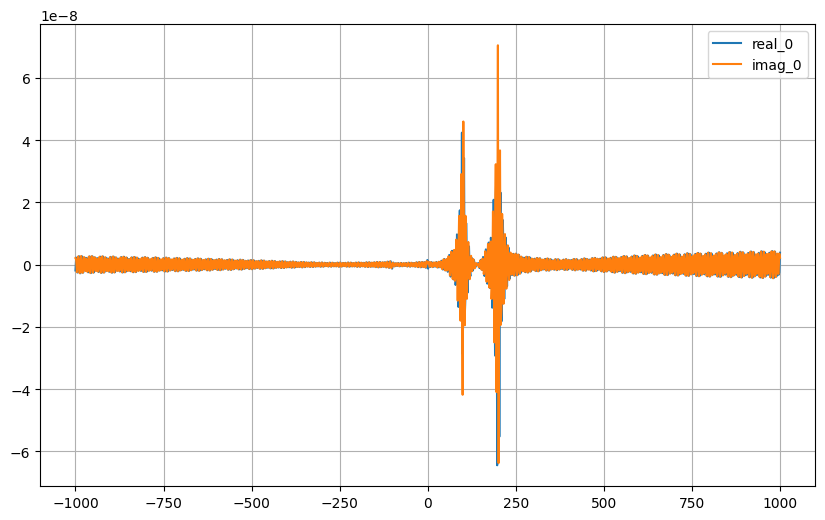

(1.71589281092125e-7 + 8.3985125711436e-8j)


In [2]:
from stringy_gpds import evolve_conformal_moment
# print(evolve_conformal_moment(2,.1,-.3,2,evolution_order="NLO",k_range=30,n_k=300))
print(evolve_conformal_moment(1.2-100j,.1,-.3,2,evolution_order="NLO",k_range=1000,n_k=1000,plot_integrand=True))

In [ ]:
from stringy_gpds import mellin_barnes_gpd
print(mellin_barnes_gpd(.2,1e-6,-1e-6,1,moment_type="non_singlet_isovector"))
print(mellin_barnes_gpd(.2,1e-6,-1e-6,1))
print(mellin_barnes_gpd(.2,1e-6,-1e-6,1,particle="gluon"))

print(mellin_barnes_gpd(.2,1e-6,-1e-6,1,moment_type="non_singlet_isovector",moment_label="Atilde"))
print(mellin_barnes_gpd(.2,1e-6,-1e-6,1,moment_label="Atilde"))
print(mellin_barnes_gpd(.2,1e-12,-1e-12,1,particle="gluon",moment_label="Atilde"))

1.6682707730939073

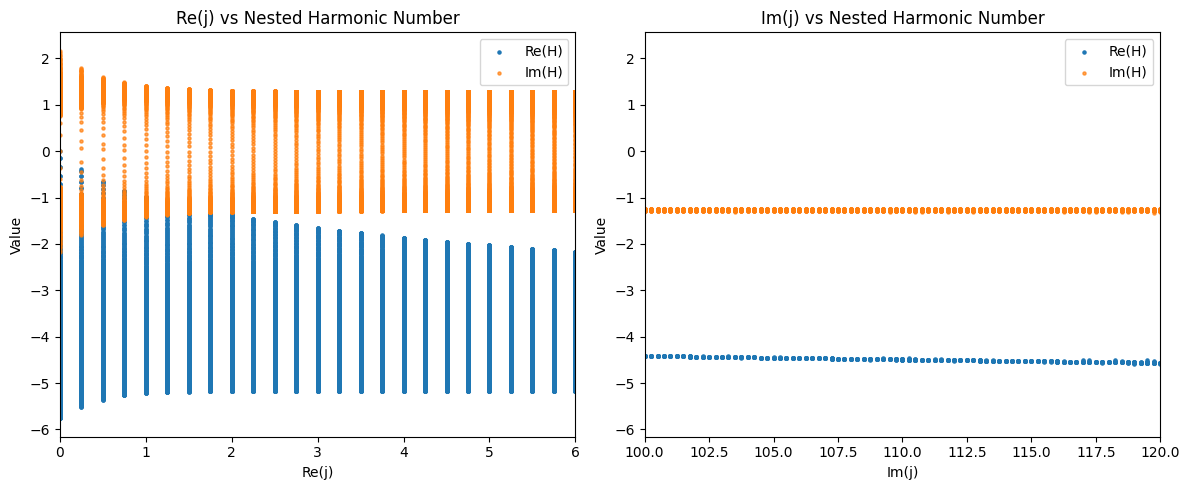

In [ ]:
import csv
import matplotlib.pyplot as plt
import config as cfg
import numpy as np

def plot_nested_harmonic_table(m1,m2,x_range_re=6,x_range_im=110):
    re_j_vals = []
    im_j_vals = []
    real_vals = []
    imag_vals = []
    filename = cfg.ANOMALOUS_DIMENSIONS_PATH / f"nested_harmonic_m1_{m1}_m2_{m2}.csv"
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # skip header
        for row in reader:
            re_j = float(row[0])
            im_j = float(row[1])
            val = complex(row[2].replace(" ", ""))  # remove spaces for safety
            re_j_vals.append(re_j)
            im_j_vals.append(im_j)
            real_vals.append(val.real)
            imag_vals.append(val.imag)

    # Plot Re(j) vs Re/Im(nested_harmonic_number)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(re_j_vals, real_vals, s=5, label='Re(H)')
    plt.scatter(re_j_vals, imag_vals, s=5, label='Im(H)', alpha=0.7)
    plt.xlabel("Re(j)")
    plt.ylabel("Value")
    plt.title("Re(j) vs Nested Harmonic Number")
    plt.legend()
    plt.xlim([0,x_range_re])

    # Plot Im(j) vs Re/Im(nested_harmonic_number)
    plt.subplot(1, 2, 2)
    plt.scatter(im_j_vals, real_vals, s=5, label='Re(H)')
    plt.scatter(im_j_vals, imag_vals, s=5, label='Im(H)', alpha=0.7)
    plt.xlabel("Im(j)")
    plt.ylabel("Value")
    plt.title("Im(j) vs Nested Harmonic Number")
    plt.legend()
    plt.xlim([100,x_range_im])

    plt.tight_layout()
    plt.show()


def plot_nested_harmonic_density(m1, m2):
    re_j_vals = []
    im_j_vals = []
    real_vals = []
    imag_vals = []
    
    filename = cfg.ANOMALOUS_DIMENSIONS_PATH / f"nested_harmonic_m1_{m1}_m2_{m2}.csv"
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # skip header
        for row in reader:
            re_j = float(row[0])
            im_j = float(row[1])
            val = complex(row[2].replace(" ", ""))  # remove spaces for safety
            re_j_vals.append(re_j)
            im_j_vals.append(im_j)
            real_vals.append(val.real)
            imag_vals.append(val.imag)

    # Get unique sorted values for grid reshaping
    re_unique = sorted(set(re_j_vals))
    im_unique = sorted(set(im_j_vals))

    nx, ny = len(re_unique), len(im_unique)
    
    # Convert to 2D arrays
    real_grid = np.full((ny, nx), np.nan)
    imag_grid = np.full((ny, nx), np.nan)

    for re, im, r, i in zip(re_j_vals, im_j_vals, real_vals, imag_vals):
        ix = re_unique.index(re)
        iy = im_unique.index(im)
        real_grid[iy, ix] = r
        imag_grid[iy, ix] = i

    X, Y = np.meshgrid(re_unique, im_unique)

    # Plot real part heatmap
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.pcolormesh(X, Y, real_grid, shading='auto', cmap='coolwarm')
    plt.colorbar(label="Re(H)")
    plt.xlabel("Re(j)")
    plt.ylabel("Im(j)")
    plt.title("Real part of Nested Harmonic Number")

    # Plot imaginary part heatmap
    plt.subplot(1, 2, 2)
    plt.pcolormesh(X, Y, imag_grid, shading='auto', cmap='coolwarm')
    plt.colorbar(label="Im(H)")
    plt.xlabel("Re(j)")
    plt.ylabel("Im(j)")
    plt.title("Imaginary part of Nested Harmonic Number")

    plt.tight_layout()
    plt.show()

def plot_anomalous_dimensions(suffix,moment_type,evolve_type,x_range_re=6,x_range_im=110):
    re_j_vals = []
    im_j_vals = []
    real_vals = []
    imag_vals = []
    if moment_type != "singlet" and suffix == "qq":
        filename = cfg.ANOMALOUS_DIMENSIONS_PATH / f"gamma_{suffix}_non_singlet_{evolve_type}_nlo.csv"
    else:
        filename = cfg.ANOMALOUS_DIMENSIONS_PATH / f"gamma_{suffix}_{evolve_type}_nlo.csv"

    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # skip header
        for row in reader:
            re_j = float(row[0])
            im_j = float(row[1])
            val = complex(row[2].replace(" ", ""))  # remove spaces for safety
            re_j_vals.append(re_j)
            im_j_vals.append(im_j)
            real_vals.append(val.real)
            imag_vals.append(val.imag)

    # Plot Re(j) vs Re/Im(nested_harmonic_number)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(re_j_vals, real_vals, s=5, label='Re(H)')
    plt.scatter(re_j_vals, imag_vals, s=5, label='Im(H)', alpha=0.7)
    plt.xlabel("Re(j)")
    plt.ylabel("Value")
    plt.title(f"Re(j) vs {moment_type} {evolve_type} gamma_{suffix} ")
    plt.legend()
    plt.xlim([0,x_range_re])

    # Plot Im(j) vs Re/Im(nested_harmonic_number)
    plt.subplot(1, 2, 2)
    plt.scatter(im_j_vals, real_vals, s=5, label='Re(H)')
    plt.scatter(im_j_vals, imag_vals, s=5, label='Im(H)', alpha=0.7)
    plt.xlabel("Im(j)")
    plt.ylabel("Value")
    plt.title("Im(j) vs {moment_type} {evolve_type} gamma_{suffix}")
    plt.legend()
    plt.xlim([-x_range_im,x_range_im])

    plt.tight_layout()
    plt.show()

plot_nested_harmonic_table(1,-2,x_range_im=110)
# plot_nested_harmonic_density(1,-2)
# plot_anomalous_dimensions("qq",moment_type="non_singlet_isovector",evolve_type="vector",x_range_im=110)

gluon A: norm = 1.3580, alpha_p = 0.6552
quark A: norm = 0.7914, alpha_p = 0.5306
gluon D: norm = 0.7738, alpha_p = 5.1354
quark D: norm = 0.7539, alpha_p = 1.9267


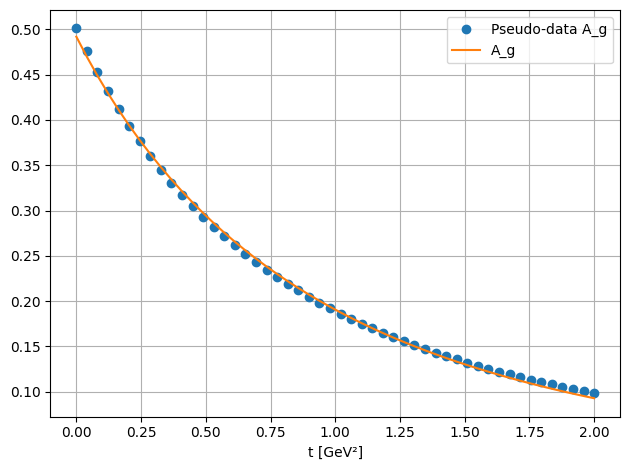

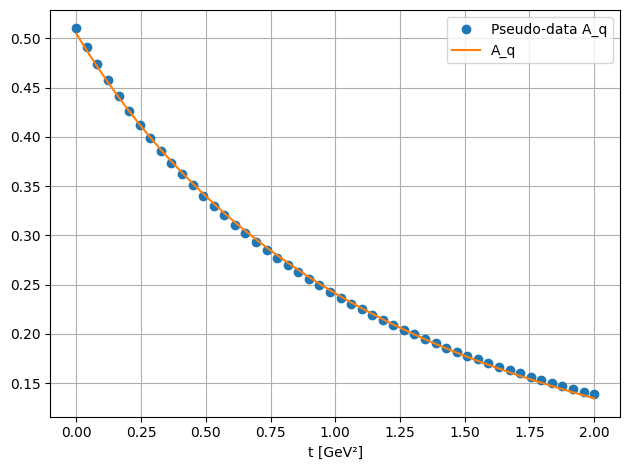

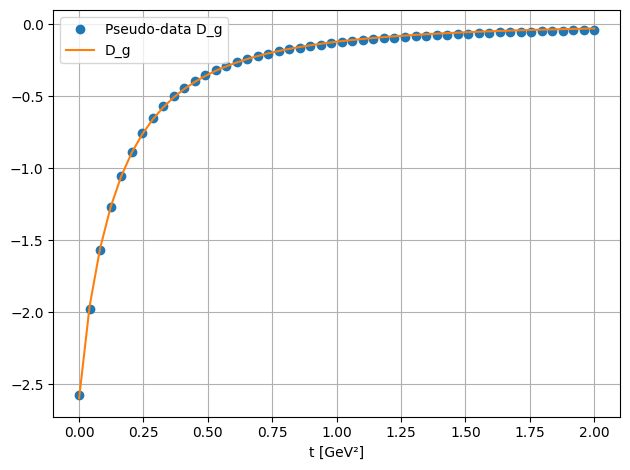

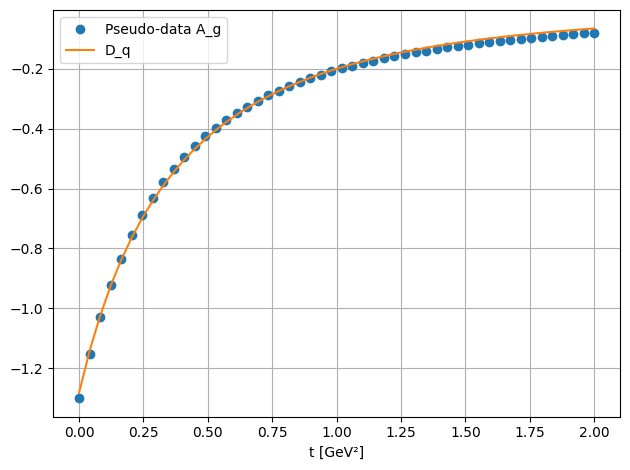

In [39]:
import numpy as np
from scipy.optimize import curve_fit
from stringy_gpds import integral_uv_pdf_regge, integral_dv_pdf_regge,integral_polarized_dv_pdf_regge,integral_polarized_uv_pdf_regge,integral_S_pdf_regge,integral_polarized_S_pdf_regge,integral_gluon_pdf_regge
import matplotlib.pyplot as plt

def fit_non_singlet_slopes(evolution_order="LO",plot = True):
    m_F12 = 0.71
    mu_p = 2.7928
    mu_n = -1.913
    mp2 = 0.9382**2
    m_a_iv_2 = 1.322**2
    m_a_is_2 = 1.736**2
    gA_ud_iv = 1.2723
    gA_ud_is = 0.416
    def Ge_p(t):
        return 1/(1-t/m_F12)**2
    def Gm_p(t):
        return mu_p * Ge_p(t)
    def Ge_n(t):
        return 0
    def Gm_n(t):
        return mu_n * Ge_p(t)
    def F_1p(t):
        num = Ge_p(t) - t/(4*mp2)*Gm_p(t)
        den = 1 - t/(4*mp2)
        return num/den
    def F_1n(t):
        num = Ge_n(t) - t/(4*mp2)*Gm_n(t)
        den = 1 - t/(4*mp2)
        return num/den
    def F_2p(t):
        num = Gm_p(t) - Ge_p(t)
        den = 1 - t/(4*mp2)
        return num/den
    def F_2n(t):
        num = Gm_n(t) - Ge_n(t)
        den = 1 - t/(4*mp2)
        return num/den
    def G_a_isovector(t):
        return gA_ud_iv/(1-t/(m_a_iv_2))**2
    def G_a_isoscalar(t):
        return gA_ud_is/(1-t/(m_a_is_2))**2
    
    def non_singlet_isovector(t, norm, alpha_p):
        uv, _ = integral_uv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type="central")
        dv, _ = integral_dv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type="central")
        return norm * (uv - dv)
    def non_singlet_isoscalar(t, norm, alpha_p):
        uv, _= integral_uv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type="central")
        dv, _ = integral_dv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type="central")
        return norm * (uv + dv)
    def polarized_non_singlet_isovector(t, norm, alpha_p):
        uv, _ = integral_polarized_uv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type="central")
        dv, _ = integral_polarized_dv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type="central")
        return norm * (uv - dv)
    def polarized_non_singlet_isoscalar(t, norm, alpha_p):
        uv, _ = integral_polarized_uv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type="central")
        dv, _ = integral_polarized_dv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type="central")
        return norm * (uv + dv)

    t_vals = np.linspace(0,-3,200)

    pseudo_data_isovector_A = F_1p(t_vals) - F_1n(t_vals)
    pseudo_data_isoscalar_A = 3 * (F_1p(t_vals) + F_1n(t_vals))
    pseudo_data_isovector_B = F_2p(t_vals) - F_2n(t_vals)
    pseudo_data_isoscalar_B = 3 * (F_2p(t_vals) + F_2n(t_vals))
    pseudo_data_isovector_Atilde = G_a_isovector(t_vals)
    pseudo_data_isoscalar_Atilde = G_a_isoscalar(t_vals)

    # blah = polarized_non_singlet_isovector(1,.5,t_vals)
    # plt.plot(-t_vals,pseudo_data_isovector_A)
    # plt.plot(-t_vals,pseudo_data_isoscalar_A)
    # plt.plot(-t_vals,pseudo_data_isovector_B)
    # plt.plot(-t_vals,pseudo_data_isoscalar_B)
    #  plt.plot(-t_vals,pseudo_data_isovector_Atilde)
    # plt.plot(-t_vals,pseudo_data_isoscalar_Atilde)
    # plt.plot(-t_vals,blah)
    # return

    # print(pseudo_data_isovector_A)
    # print(pseudo_data_isovector_B)
    # print(pseudo_data_isoscalar_A)
    # print(pseudo_data_isoscalar_B)
    # print(pseudo_data_isovector_Atilde)
    # print(pseudo_data_isoscalar_Atilde)
    # return
    # Perform fits
    # A fits (non-polarized)[
    popt_A_iv, pcov_A_iv = curve_fit(non_singlet_isovector, t_vals, pseudo_data_isovector_A, p0=[1,0.6], bounds=([1,.1],[1.0001,3]))
    popt_A_is, pcov_A_is = curve_fit(non_singlet_isoscalar, t_vals, pseudo_data_isoscalar_A, p0=[1,1],bounds=([.1,.1],[5,3]))

    # # B fits (non-polarized)
    popt_B_iv, pcov_B_iv = curve_fit(non_singlet_isovector, t_vals, pseudo_data_isovector_B, p0=[4,1.5],bounds=([2,1],[6,3]))
    popt_B_is, pcov_B_is = curve_fit(non_singlet_isoscalar, t_vals, pseudo_data_isoscalar_B, p0=[-0.1,1.1],bounds=([-2,1],[-.1,3]))

    # # Atilde fits (polarized)
    popt_Atilde_iv, pcov_Atilde_iv = curve_fit(polarized_non_singlet_isovector, t_vals, pseudo_data_isovector_Atilde, p0=[0.8,1],bounds=([.5,.1],[2,3]))
    popt_Atilde_is, pcov_Atilde_is = curve_fit(polarized_non_singlet_isoscalar, t_vals, pseudo_data_isoscalar_Atilde, p0=[1.7,0.3],bounds=([.2,.1],[3,1.5]))

    # Print or return the results
    print("Fitted parameters:")
    print(f"A isovector: norm = {popt_A_iv[0]:.4f}, alpha_p = {popt_A_iv[1]:.4f}")
    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isovector_A, 'o', label='Pseudo-data A (iv)')
        plt.plot(-t_vals, non_singlet_isovector(t_vals, *popt_A_iv), '-', label='Fit A (iv)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
    print(f"A isoscalar: norm = {popt_A_is[0]:.4f}, alpha_p = {popt_A_is[1]:.4f}")
    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isoscalar_A, 'o', label='Pseudo-data A (is)')
        plt.plot(-t_vals, non_singlet_isoscalar(t_vals, *popt_A_is), '-', label='Fit A (is)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
    print(f"B isovector: norm = {popt_B_iv[0]:.4f}, alpha_p = {popt_B_iv[1]:.4f}")
    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isovector_B, 'o', label='Pseudo-data B (iv)')
        plt.plot(-t_vals, non_singlet_isovector(t_vals, *popt_B_iv), '-', label='Fit B (iv)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
    print(f"B isoscalar: norm = {popt_B_is[0]:.4f}, alpha_p = {popt_B_is[1]:.4f}")

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isoscalar_B, 'o', label='Pseudo-data B (is)')
        plt.plot(-t_vals, non_singlet_isoscalar(t_vals, *popt_B_is), '-', label='Fit B (is)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
    print(f"Atilde isovector: norm = {popt_Atilde_iv[0]:.4f}, alpha_p = {popt_Atilde_iv[1]:.4f}")

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isovector_Atilde, 'o', label='Pseudo-data Atilde (iv)')
        plt.plot(-t_vals, polarized_non_singlet_isovector(t_vals, *popt_Atilde_iv), '-', label='Fit Atilde (iv)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
    print(f"Atilde isoscalar: norm = {popt_Atilde_is[0]:.4f}, alpha_p = {popt_Atilde_is[1]:.4f}")

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isoscalar_Atilde, 'o', label='Pseudo-data Atilde (is)')
        plt.plot(-t_vals, polarized_non_singlet_isoscalar(t_vals, *popt_Atilde_is), '-', label='Fit Atilde (is)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    return

from stringy_gpds import gluon_singlet_regge_A,gluon_singlet_regge_D, quark_singlet_regge_A, quark_singlet_regge_D, MOMENTUM_SPACE_MOMENTS_PATH
def fit_singlet_slopes(Nf=3,evolution_order="LO",plot=True):
    # Dipole form from table III in 2310.08484
    g_A = 0.501
    m_A_g2 = 1.262**2
    g_D = -2.572
    m_D_g2 = 0.538**2

    q_A = 0.510
    m_A_q2 = 1.477**2
    q_D = -1.30
    m_D_q2 = 0.81**2

    def gluon_A(t):
        return g_A/(1-t/m_A_g2)**2
    def quark_A(t):
        return q_A/(1-t/m_A_q2)**2
    def gluon_D(t):
        return g_D/(1-t/m_D_g2)**2
    def quark_D(t):
        return q_D/(1-t/m_D_q2)**2

    def gluon_singlet_A(t,norm,alpha_p):
        res, _ = gluon_singlet_regge_A(2,0,t,alpha_p,moment_label="A",evolution_order=evolution_order)
        return norm*res
    def quark_singlet_A(t,norm,alpha_p):
        res, _ = quark_singlet_regge_A(2,0,t,Nf,alpha_p,moment_label="A",evolution_order=evolution_order)
        return norm*res
    
    # Generate pseudo data
    t_vals = np.linspace(-1e-6,-2,100)

    pseudo_data_gluon_A = gluon_A(t_vals)
    pseudo_data_quark_A = quark_A(t_vals)
    pseudo_data_gluon_D = gluon_D(t_vals)
    pseudo_data_quark_D = quark_D(t_vals)
    
    popt_A_g, pcov_A_g = curve_fit(gluon_singlet_A, t_vals, pseudo_data_gluon_A, p0=[.5,0.6], bounds=([.2,.4],[1.5,1.5]))
    print(f"gluon A: norm = {popt_A_g[0]:.4f}, alpha_p = {popt_A_g[1]:.4f}")
    popt_A_q, pcov_A_q = curve_fit(quark_singlet_A, t_vals, pseudo_data_quark_A, p0=[.5,0.8], bounds=([.2,.4],[1.5,1.5]))
    print(f"quark A: norm = {popt_A_q[0]:.4f}, alpha_p = {popt_A_q[1]:.4f}")

    alpha_p_T = popt_A_g[1]
    alpha_p_ud = popt_A_q[1]
    
    # j = 2 independent of eta
    def gluon_singlet_D(t,norm,alpha_p_S):
        res, _ = gluon_singlet_regge_D(2, 1, t, alpha_p_T, alpha_p_S, moment_label="A", evolution_order=evolution_order)
        return norm*res
    def gluon_singlet_D_vec(t_arr, norm, alpha_p_S):
        return np.array([
            gluon_singlet_D(t,norm,alpha_p_S)
            for t in t_arr
        ], dtype=float)
    
    def quark_singlet_D(t,norm,alpha_p_s):
        res, _ = quark_singlet_regge_D(2,1,t,Nf,alpha_p_ud,alpha_p_s,moment_label="A",evolution_order=evolution_order)
        return norm*res
    def quark_singlet_D_vec(t_arr, norm, alpha_p_S):
        return np.array([
            quark_singlet_D(t,norm,alpha_p_S)
            for t in t_arr
        ], dtype=float)
    
    # t_2 = np.linspace(-1e-6,-1,10)
    # print(gluon_singlet_D_vec(t_2,1,6))
    # return 

    popt_D_g, pcov_D_g = curve_fit(gluon_singlet_D_vec, t_vals, pseudo_data_gluon_D, p0=[1,4.2], bounds=([.1,3],[2,6]))
    print(f"gluon D: norm = {popt_D_g[0]:.4f}, alpha_p = {popt_D_g[1]:.4f}")
    popt_D_q, pcov_D_q = curve_fit(quark_singlet_D_vec, t_vals, pseudo_data_quark_D, p0=[2,1], bounds=([.2,1],[3,3]))
    print(f"quark D: norm = {popt_D_q[0]:.4f}, alpha_p = {popt_D_q[1]:.4f}")

    # Use less data points for plot
    t_vals = np.linspace(-1e-6,-2,50)
    pseudo_data_gluon_A = gluon_A(t_vals)
    pseudo_data_quark_A = quark_A(t_vals)
    pseudo_data_gluon_D = gluon_D(t_vals)
    pseudo_data_quark_D = quark_D(t_vals)

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_gluon_A, 'o', label='Pseudo-data A_g')
        plt.plot(-t_vals, gluon_singlet_A(t_vals, *popt_A_g), '-', label='A_g')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_quark_A, 'o', label='Pseudo-data A_q')
        plt.plot(-t_vals, quark_singlet_A(t_vals, *popt_A_q), '-', label='A_q')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_gluon_D, 'o', label='Pseudo-data D_g')
        plt.plot(-t_vals, gluon_singlet_D_vec(t_vals, *popt_D_g), '-', label='D_g')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_quark_D, 'o', label='Pseudo-data A_g')
        plt.plot(-t_vals, quark_singlet_D_vec(t_vals, *popt_D_q), '-', label='D_q')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    return

fit_singlet_slopes()
# fit_non_singlet_slopes(evolution_order="LO")      
# fit_non_singlet_slopes(evolution_order="NLO")       

In [41]:
fit_non_singlet_slopes(evolution_order="LO",plot=False)      
fit_non_singlet_slopes(evolution_order="NLO",plot=False)   

Fitted parameters:
A isovector: norm = 1.0000, alpha_p = 0.6582
A isoscalar: norm = 0.9879, alpha_p = 0.9426
B isovector: norm = 3.8319, alpha_p = 1.4581
B isoscalar: norm = -0.1215, alpha_p = 1.1298
Atilde isovector: norm = 1.0010, alpha_p = 0.4543
Atilde isoscalar: norm = 0.7129, alpha_p = 0.2974
Fitted parameters:
A isovector: norm = 1.0000, alpha_p = 0.6345
A isoscalar: norm = 0.9703, alpha_p = 0.9492
B isovector: norm = 3.8170, alpha_p = 1.3929
B isoscalar: norm = -0.1194, alpha_p = 1.1368
Atilde isovector: norm = 0.9890, alpha_p = 0.4553
Atilde isoscalar: norm = 0.7152, alpha_p = 0.3140


gluon A: norm = 1.3500, alpha_p = 0.5584
quark A: norm = 0.7829, alpha_p = 0.5044
gluon D: norm = 0.7058, alpha_p = 5.2081
quark D: norm = 0.7019, alpha_p = 1.9657


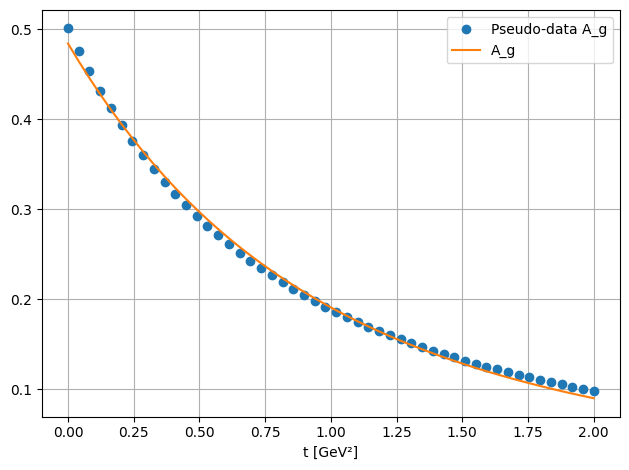

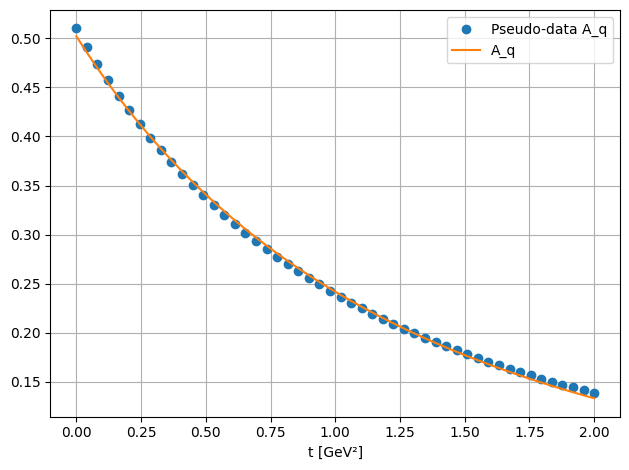

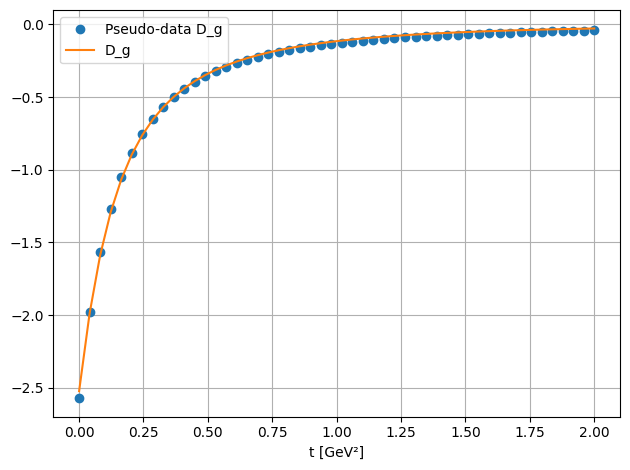

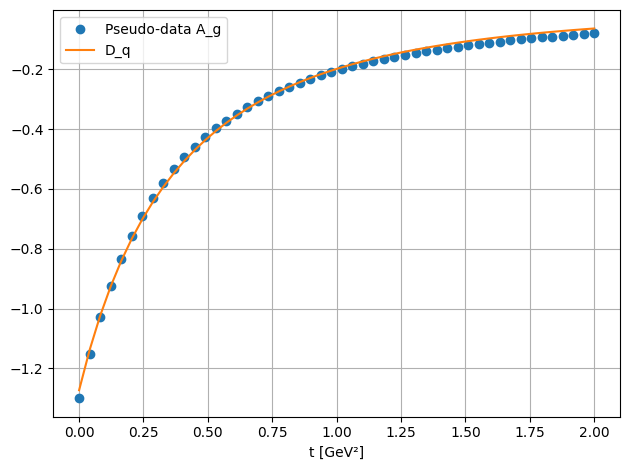

In [40]:
fit_singlet_slopes(evolution_order="NLO")

In [7]:
from stringy_gpds import d_weight, gamma_qg, gamma_gq
Nc = 3 
Nf = 3
c_a = Nc
c_f = (Nc**2 - 1 )/(2*Nc)
t_f = .5 
# c_f = Nc
print(24* c_f * Nf * t_f)
print(18*c_f**2 -142/3 * c_a * c_f + 8/3 * Nf * c_f * t_f)
print(-68/3 * c_a**2 + 8 * c_f * Nf * t_f + 40/3 * c_a * t_f * Nf)
# print(24* c_f * Nf + 18*c_f**2 -142/3 * c_a * c_f + 8/3 * Nf * c_f - 2*(-68/3 * c_a**2 + 8 * c_f * Nf + 40/3 * c_a *Nf) )
# j = 1
# print(-24*Nf*t_f/((j+1)*(j+2)))
# d1 = d_weight(1,1,j+1)
# d0 = d_weight(1,0,j+1)
# print(2 * Nf * ( 2 * d1 - d0 ) )
# print(gamma_qg(1,evolve_type="axial"))
# print(-2 * c_f * ( 2*d0 - d1 ) )
# print(gamma_gq(1,evolve_type="axial"))


48.0
-151.99999999999997
-128.0


In [1]:
from stringy_gpds import harmonic_number, nested_harmonic_number, harmonic_number_tilde, gamma_qq, gamma_gq, gamma_qg, gamma_gg

j = 2.3 - 10j
print(gamma_qq(j,moment_type="non_singlet_isovector",evolution_order="NLO"))
print(gamma_qq(j,moment_type="singlet",evolution_order="NLO"))
print(gamma_qg(j,evolution_order="NLO"))
print(gamma_gq(j,evolution_order="NLO"))
print(gamma_gg(j,evolution_order="NLO"))

# print(gamma_qq(0,moment_type="non_singlet_isovector",evolution_order="NLO"))
# print(gamma_qq(1,moment_type="singlet",evolution_order="NLO"))
# print(gamma_qg(1,evolution_order="NLO"))
# print(gamma_gq(1,evolution_order="NLO"))
# print(gamma_gg(1,evolution_order="NLO"))

(-153957.907707448 + 497239.770982828j)
(-153964.125967506 + 497239.758209148j)
(-479852.359712122 - 302.904417948093j)
(-213286.761099654 - 126.101891716561j)
(3113310.86413811 - 10066847.4730359j)


In [2]:
from stringy_gpds import harmonic_number, nested_harmonic_number, harmonic_number_tilde, gamma_qq, gamma_gq, gamma_qg, gamma_gg

# print(gamma_qq(0,moment_type="non_singlet_isovector",evolution_order="NLO",evolve_type="axial"))
print(gamma_qq(0,moment_type="singlet",evolution_order="NLO",evolve_type="axial"))
print(gamma_qg(0,evolution_order="NLO",evolve_type="axial"))
print(gamma_gq(0,evolution_order="NLO",evolve_type="axial"))
print(gamma_gg(0,evolution_order="NLO",evolve_type="axial"))

48.00000000000003
-0.0
-151.99999999999994
-128.00000000000006


In [ ]:
from stringy_gpds import gluon_singlet_regge,quark_singlet_regge
print(gluon_singlet_regge(1,0,0,"Atilde",evolution_order="NLO",evolve_type="axial"))
print(gluon_singlet_regge(1,0,0,"A",evolution_order="NLO",evolve_type="vector"))

(np.float64(0.3119589530572207), 0)
(np.float64(-16.128889652190583), 0)


In [4]:
from stringy_gpds import evolve_conformal_moment
print(evolve_conformal_moment(1,0,-1e-4,1,moment_type="non_singlet_isovector",evolution_order="LO"))
print(evolve_conformal_moment(1,0,-1e-4,2,moment_type="non_singlet_isovector",evolution_order="LO"))

0.9997287320864564
0.9997287320864564


In [1]:
from stringy_gpds import evolve_conformal_moment
quark = evolve_conformal_moment(2,0,-1e-4,1,moment_type="singlet",evolution_order="LO")
gluon = evolve_conformal_moment(2,0,-1e-4,1,moment_type="singlet",evolution_order="LO",particle="gluon")
print(quark+gluon)

quark = evolve_conformal_moment(2,0,-1e-4,2,moment_type="singlet",evolution_order="LO")
gluon = evolve_conformal_moment(2,0,-1e-4,2,moment_type="singlet",evolution_order="LO",particle="gluon")
print(quark+gluon)

0.999459569431316
0.999459569431316


In [2]:
from stringy_gpds import evolve_conformal_moment
quark = evolve_conformal_moment(2,0,-1e-4,1,moment_type="singlet",evolution_order="LO",moment_label="Atilde")
gluon = evolve_conformal_moment(2,0,-1e-4,1,moment_type="singlet",evolution_order="LO",particle="gluon",moment_label="Atilde")
print(quark+gluon)

quark = evolve_conformal_moment(2,0,-1e-4,2,moment_type="singlet",evolution_order="LO",moment_label="Atilde")
gluon = evolve_conformal_moment(2,0,-1e-4,2,moment_type="singlet",evolution_order="LO",particle="gluon",moment_label="Atilde")
print(quark+gluon)

0.298339243852892
0.248353273256183


In [3]:
from stringy_gpds import evolve_conformal_moment
print(evolve_conformal_moment(1,0,-1e-6,1,evolution_order="NLO"))
print(evolve_conformal_moment(1,0,-1e-6,2,evolution_order="NLO"))

0.9999465024833201
0.99994650248332


In [4]:
from stringy_gpds import evolve_conformal_moment
quark = evolve_conformal_moment(2,0,0,1,Nf=3,moment_type="singlet",evolution_order="NLO")
gluon = evolve_conformal_moment(2,0,0,1,Nf=3,moment_type="singlet",evolution_order="NLO",particle="gluon")
# print(quark,gluon)
print(quark+gluon)

quark = evolve_conformal_moment(2,0,0,2,Nf=3,moment_type="singlet",evolution_order="NLO")
gluon = evolve_conformal_moment(2,0,0,2,Nf=3,moment_type="singlet",evolution_order="NLO",particle="gluon")
# print(quark,gluon)
print(quark+gluon)

0.999994139203132
0.999994139203132


In [ ]:
import numpy as np
def theta(j,k):
    if isinstance(j,(int,float)) and isinstance(k,(int,float)):
        return int(j > k)
    else:
        epsilon = 1e-2
        result = 1 / (1+ np.exp((np.real(j)-np.real(k))/epsilon))
        return result

In [ ]:
from stringy_gpds import (
    check_particle_type, PLOT_PATH,IMPACT_PARAMETER_MOMENTS_PATH,
    generate_filename, read_ft_from_csv
)
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
import numpy as np

def plot_fourier_transform_transverse_moments_grid(j_max,eta,mu,particle="quark", interpolation=True,n_int=300, vmin = 0 , vmax = 1 ):
    """
    Generates a density plot of the 2D Fourier transfrom of RGE-evolved 
    conformal moments for a given moment type and a transversely polarzied target.
    Automatically uses A and B moments. Code requires all tables to have same b_max
    and be available on the file system. To generate the data use the function
    plot_fourier_transform_transverse_moments.
    
    Parameters:
    - j_max (float): Maximal Conformal spin
    - eta (float): Skewness parameter
    - mu (float): RGE scale
    - particle (str. optional): "quark" or "gluon". Default is quark.
    - moment_label (str. optiona): Label of conformal moment, e.g. A
    - interpolation (bool, optional): Interpolate data points on finer grid
    - n_int (int, optional): Number of points used for interpolation
    - vmin (float ,optioanl): Sets minimum value of colorbar
    - vmax (float, optional): Sets maximum value of colorbar
    """
    def get_subplot_positions_and_heights(n_rows,n_cols):
        """
        Returns the positions and heights of each subplot in the grid.
        
        Returns:
        - A list of row heights and positions for each subplot.
        """
        row_positions_and_heights = []
        
        # Step 1: Create a hidden figure to determine subplot heights without labels/ticks
        fig_hidden, axs_hidden = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows*4))
        fig_hidden.subplots_adjust(wspace=0, hspace=0)  # Remove extra spacing
        
        for row in range(n_rows):
            # Get the bounding box (position and height) of the last column in each row
            bbox = axs_hidden[row,-1].get_position()
            row_positions_and_heights.append((bbox.x0, bbox.y0, bbox.width, bbox.height))  # Position (x0, y0), width, and height
        
        plt.close(fig_hidden)  # Close the hidden figure
        
        return row_positions_and_heights

            
    check_particle_type(particle)

    if len(vmin)<j_max or len(vmax)<j_max:
        raise ValueError("Supply vmin and vmax as arrays of length j_max")

    FILE_PATH = PLOT_PATH + "imp_param_transv_pol_moments.pdf"

    moment_types = ["non_singlet_isovector", "non_singlet_isoscalar", "u", "d"]

    # Initialize cache to store Fourier transforms for "non_singlet_isovector" and "non_singlet_isoscalar"
    #cache = {}
    cache = {j: {mom_type: None for mom_type in moment_types} for j in range(1, j_max + 1)}

    # Determine figure layout
    fig, axs = plt.subplots(j_max, len(moment_types), figsize=(len(moment_types) * 4, j_max*4))
    row_positions_and_heights = get_subplot_positions_and_heights(j_max,len(moment_types))

    title_map = {
        "non_singlet_isovector": "u-d",
        "non_singlet_isoscalar": "u+d",
        "u": "u",
        "d": "d"
    }
    hbarc = 0.1975

    for j in range(1, j_max + 1):
        for i, mom_type in enumerate(moment_types):
            READ_WRITE_PATH = IMPACT_PARAMETER_MOMENTS_PATH + "imp_param_transv_pol_moment_j_" + str(j) + "_"  + mom_type 
            row, col = j-1, i
            ax = axs[row, col]

            title = title_map[mom_type]

            # Compute Fourier transform and cache the results for non_singlet_isovector and non_singlet_isoscalar
            if mom_type in ["non_singlet_isovector", "non_singlet_isoscalar"]:
                if cache[j][mom_type] is None:
                    file_name = generate_filename(eta,0,mu,READ_WRITE_PATH,"central")
                    b_x_fm, b_y_fm, fourier_transform_moment_values_flat = read_ft_from_csv(file_name)
                    b_max = max(b_x_fm)/hbarc
                    n_b = len(fourier_transform_moment_values_flat)
                    b_x = np.linspace(-b_max, b_max, n_b)
                    b_y = np.linspace(-b_max, b_max, n_b)
                    cache[j][mom_type] = fourier_transform_moment_values_flat

            if mom_type in ["u","d"]:
                file_name = generate_filename(eta,0,mu,READ_WRITE_PATH,"central")
                b_x_fm, b_y_fm, _ = read_ft_from_csv(file_name)

                if mom_type == "u":
                    prf = 1
                if mom_type == "d":
                    prf = -1 
                fourier_transform_moment_values_flat = (cache[j]["non_singlet_isoscalar"] + prf * cache[j]["non_singlet_isovector"]) / 2

            if interpolation:
                ft_interpolation = RectBivariateSpline(b_x_fm, b_y_fm, fourier_transform_moment_values_flat)

                # Call the interpolation on a finer grid
                b_x = np.linspace(-b_max, b_max, n_int)
                b_y = np.linspace(-b_max, b_max, n_int)
                b_x_fm = b_x * hbarc
                b_y_fm = b_y * hbarc

                fourier_transform_moment_values_flat = ft_interpolation(b_x_fm, b_y_fm)

            # Generate 2D density plot
            im = ax.pcolormesh(b_x_fm, b_y_fm, fourier_transform_moment_values_flat, 
                                shading='auto', cmap='jet',vmin=vmin[j-1], vmax=vmax[j-1],rasterized=True)
            ax.set_xlabel(r'$b_x\,[\mathrm{fm}]$', fontsize=14)
            if i == 0:
                ax.set_ylabel(r'$b_y\,[\mathrm{fm}]$', fontsize=14)
            if j == 1:
                ax.set_title(rf"$\rho_{{n,\perp}}^{{{title}}}$", fontsize=14)

            ax.set_xlim([-b_max * hbarc, b_max * hbarc])
            ax.set_ylim([-b_max * hbarc, b_max * hbarc])
            
            if col == len(moment_types)-1:
                # print(ax.get_position().x1, ax.get_position().y0,ax.get_position().height)
                # Get positions without labels
                x0, y0, width, height = row_positions_and_heights[row]
                # We shift the x position by the width of the plot
                # such that it attaches to the right
                x0 += width
                cbar_ax = fig.add_axes([x0, y0, 0.01, height])
                fig.colorbar(im, cax=cbar_ax)
            if col == 0:
                ax.text(
                    0.05, 0.95,  
                    rf"$n={j}$",  
                    transform=ax.transAxes, 
                    ha='left', va='top', 
                    fontsize=14, color='black', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3')  # Adds a semi-transparent background
                )

            # Remove ticks and labels
            if i != 0:
                ax.set_yticks([])
                ax.set_yticklabels([])
                ax.set_ylabel(None)
            if j != j_max:
                ax.set_xticks([])
                ax.set_xticklabels([])
                ax.set_xlabel(None)

    plt.subplots_adjust(wspace=0, hspace=0)


    # File export
    plt.savefig(FILE_PATH,format="pdf",bbox_inches="tight",dpi=600)

    # Adjust layout and show the plot
    plt.show()
    plt.close()

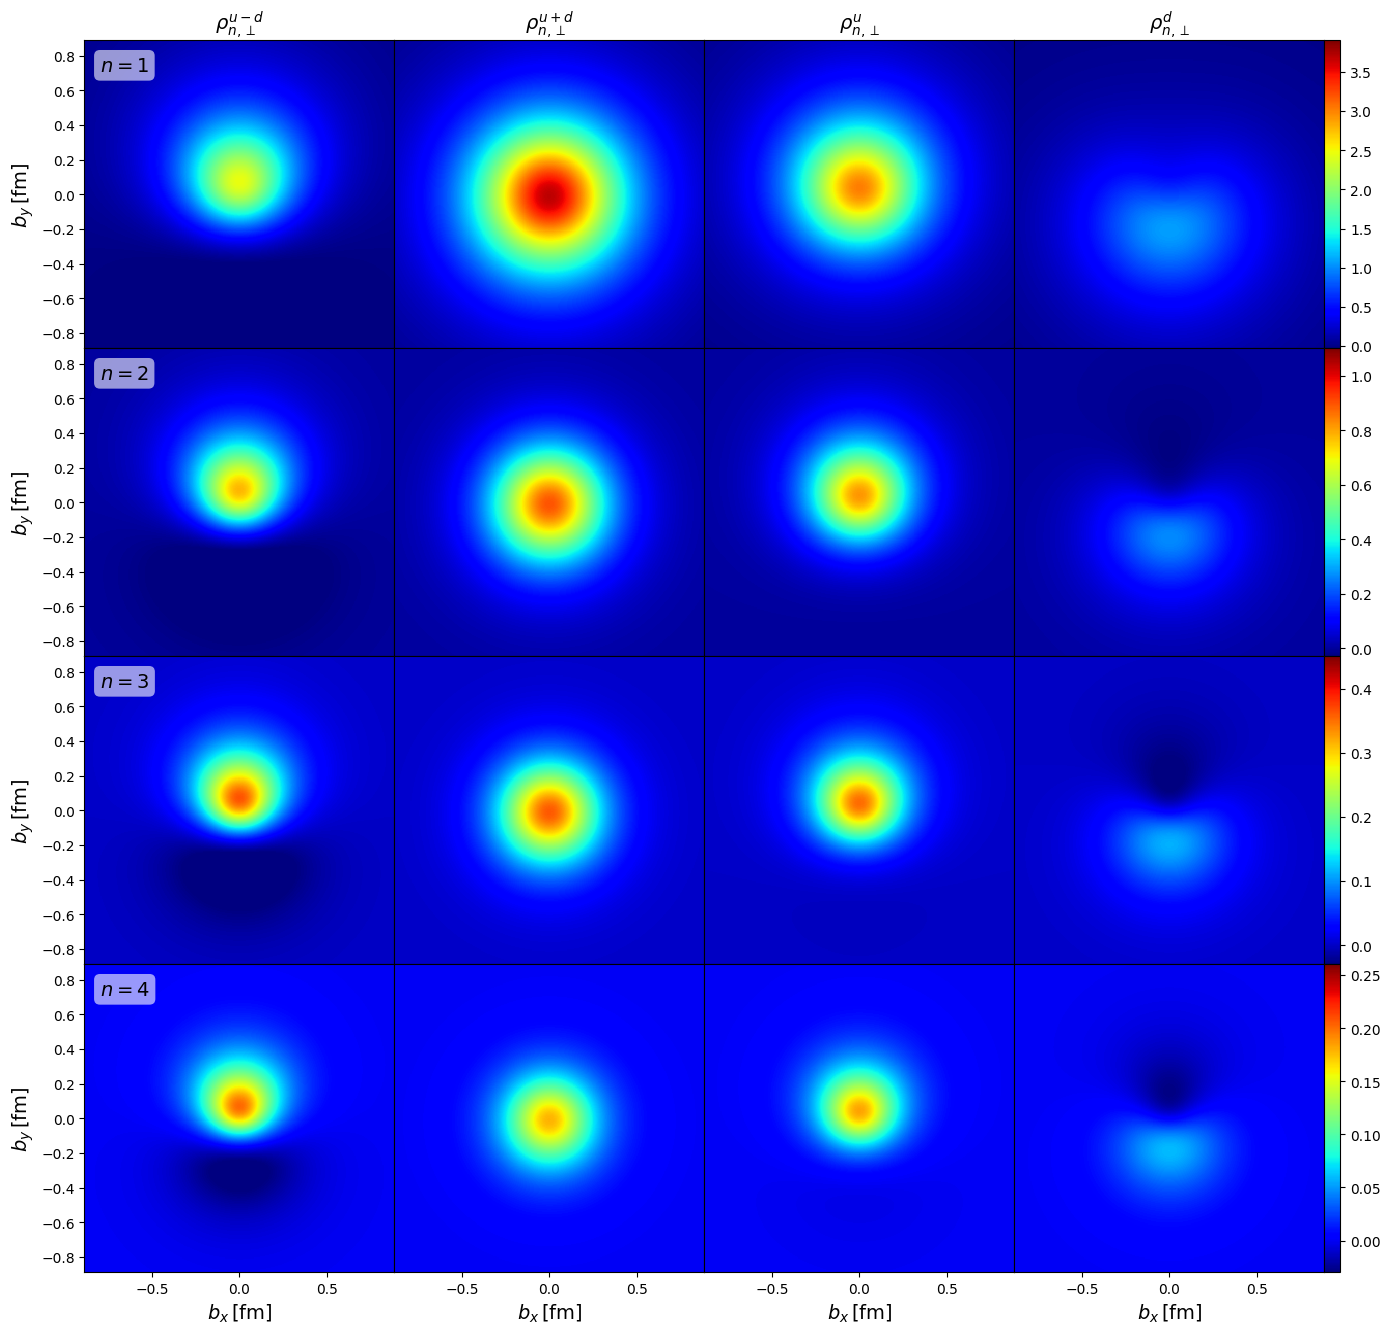

In [ ]:
plot_fourier_transform_transverse_moments_grid(4,0,2,interpolation=True,vmin=[-0.03,-.03,-0.03,-0.03],vmax=[3.9,1.1,.45,.26])

In [3]:
j_u_minus_d, j_u_minus_d_plus, j_u_minus_d_minus =  total_spin(0,2,particle="quark",moment_type="non_singlet_isovector")
j_u_plus_d, j_u_plus_d_plus, j_u_plus_d_minus =  total_spin(0,2,particle="quark",moment_type="non_singlet_isoscalar")
j_u = (j_u_minus_d + j_u_plus_d)/2
j_d = (j_u_plus_d - j_u_minus_d)/2
j_u_plus = np.sqrt(j_u_minus_d_plus**2+j_u_plus_d_plus**2)/2
j_u_minus = np.sqrt(j_u_minus_d_minus**2+j_u_plus_d_minus**2)/2
# print(l_u_minus_d_plus,l_u_minus_d_minus)
# print(l_u_plus_d_plus,l_u_plus_d_minus)
print(j_u_plus_d,j_u_plus_d_plus,j_u_plus_d_minus)
print(j_u_minus_d,j_u_minus_d_plus,j_u_minus_d_minus)
print(j_u,j_d)
print(j_u_plus,j_u_minus)
# print(l_u+l_d+l_s)

0.17089890717084838 0.02185827594749296 0.020865769369075665
0.4208675673440858 0.08602358143137934 0.08211755651547331
0.2958832372574671 -0.12498433008661872
0.04437860066991156 0.042363526232584235


Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.011715 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.012970 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.009802 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/singlet_quark_GPD_Htilde.pdf


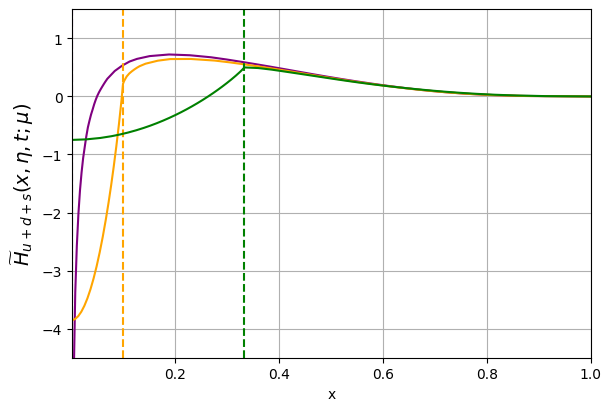

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="singlet",gpd_label="Htilde",error_bars=False, read_from_file= True,write_to_file=False, y_0= -4.5, y_1 =1.5)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.027395 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.023764 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.020663 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isovector_quark_GPD_E.pdf


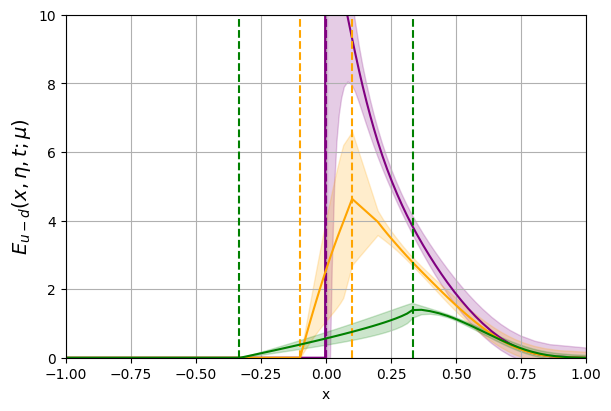

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,gpd_type="non_singlet_isovector",gpd_label="E",error_bars=True, read_from_file= True,write_to_file=False, y_0= 0, y_1 =10)

Plots of conformal moments $\mathbb{G}(n,\eta,tb_\perp)$ in momentum space

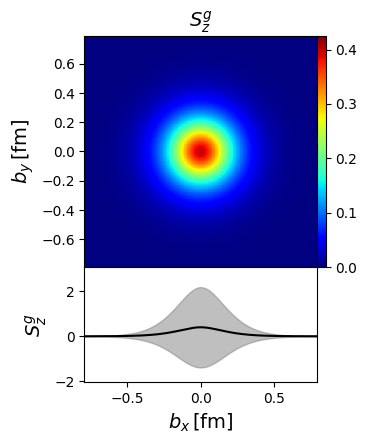

In [5]:
plot_fourier_transform_singlet_helicity(0,2,particle="gluon",read_from_file=True,write_to_file=False,b_max=4, n_b = 50, vmin=0,vmax=.425)

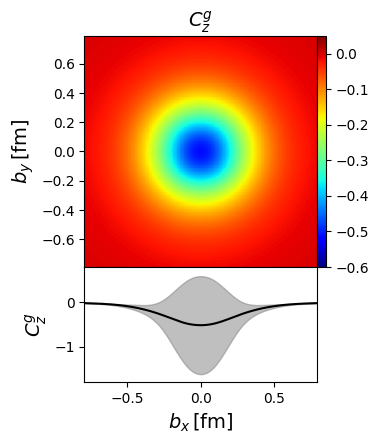

In [6]:
plot_fourier_transform_singlet_spin_orbit_correlation(0,2,particle="gluon",read_from_file=True,write_to_file=False,b_max=4, n_b = 50,Delta_max=8,vmin = -.6, vmax = 0.05 ,ymin=-1.8, ymax = .8)

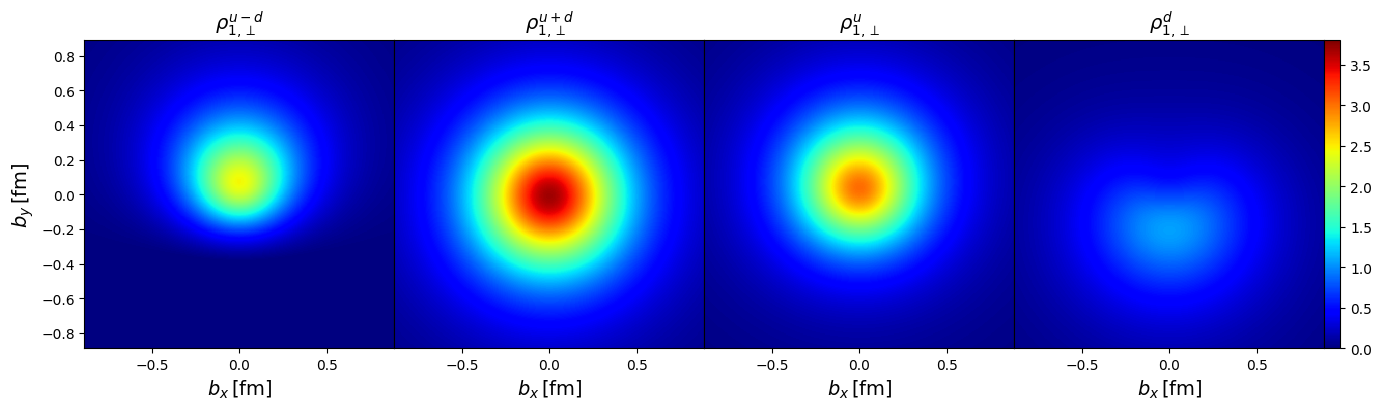

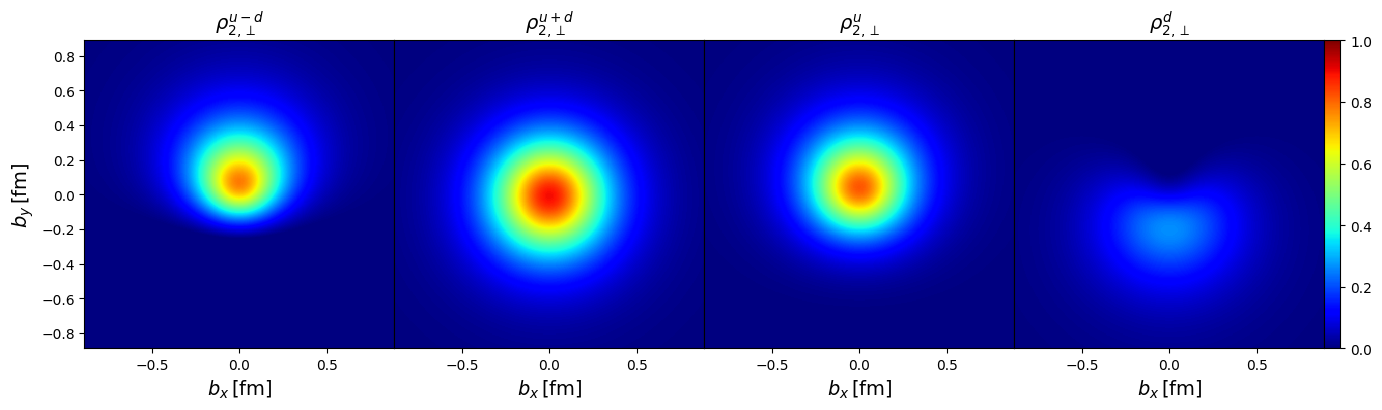

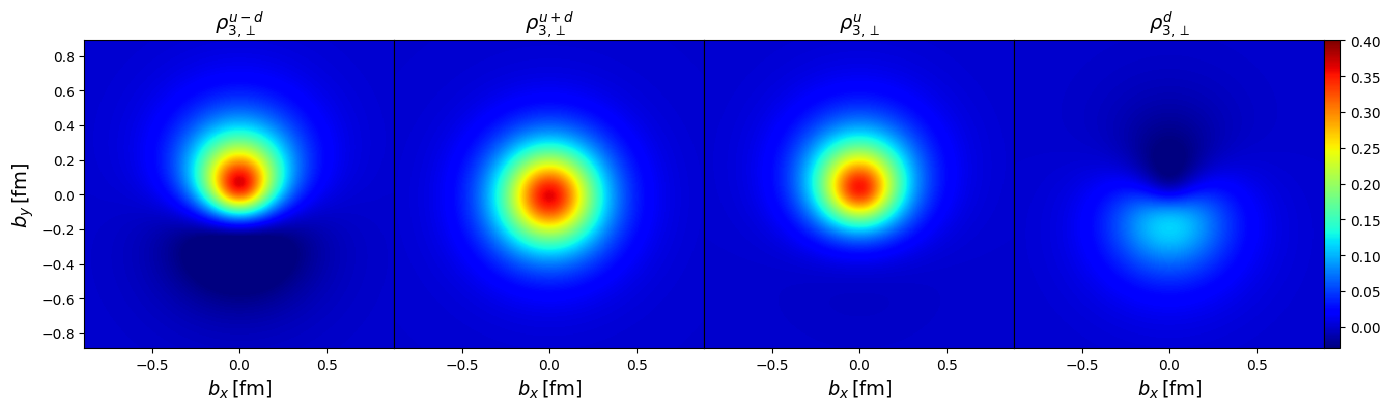

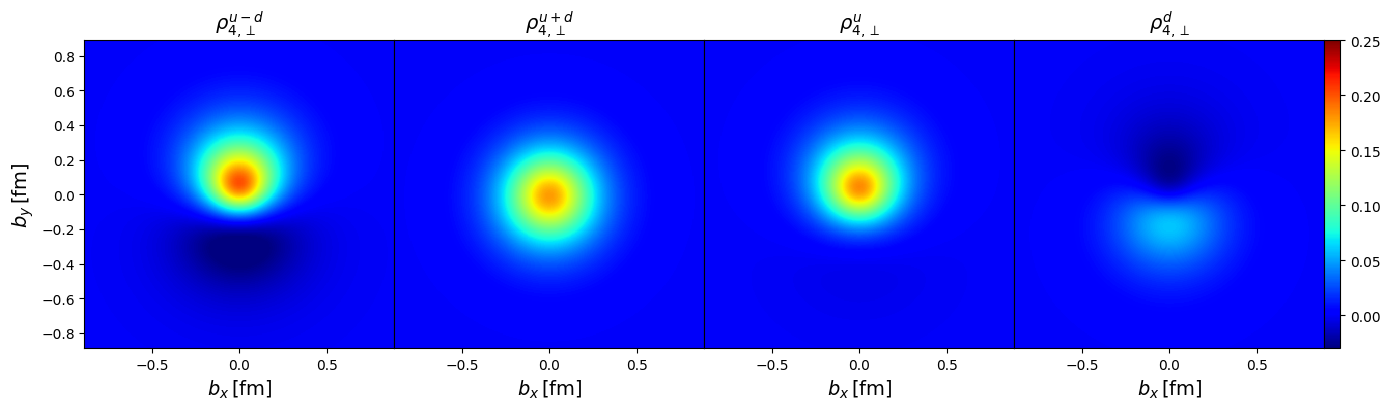

In [3]:
plot_fourier_transform_transverse_moments(1,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=0, vmax=3.8)
plot_fourier_transform_transverse_moments(2,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=0, vmax=1)
plot_fourier_transform_transverse_moments(3,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=-.03, vmax=.4)
plot_fourier_transform_transverse_moments(4,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=-.03, vmax=.25)

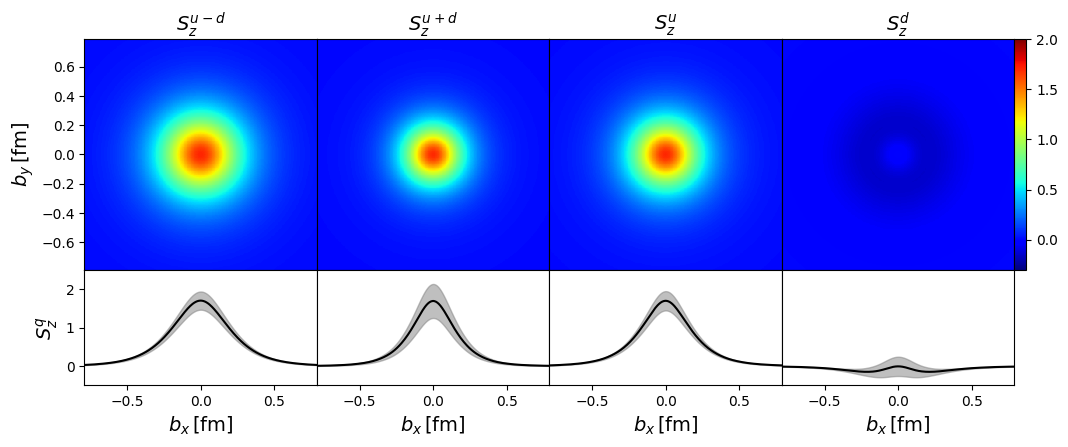

In [2]:
plot_fourier_transform_quark_helicity(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",vmin = -0.3, vmax = 2)

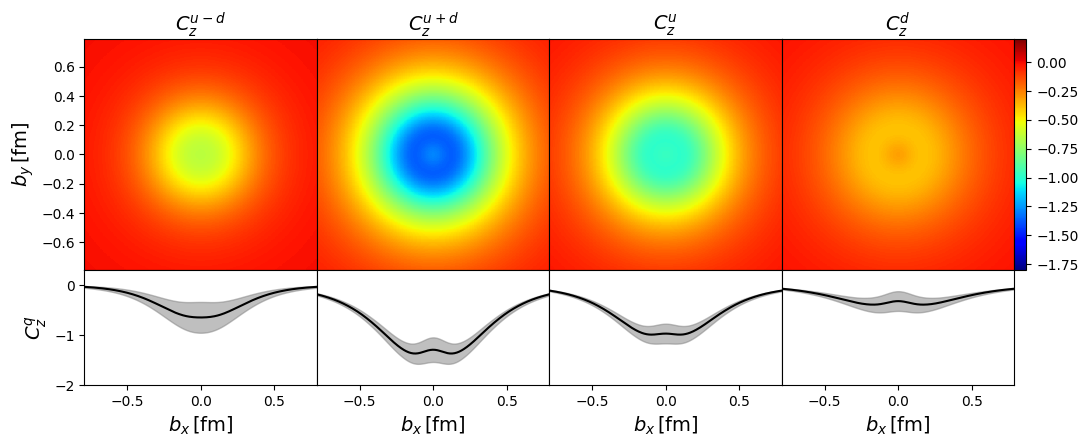

In [3]:
plot_fourier_transform_quark_spin_orbit_correlation(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",Delta_max=8,vmin = -1.8, vmax = .2,ymin=-2, ymax = .3)

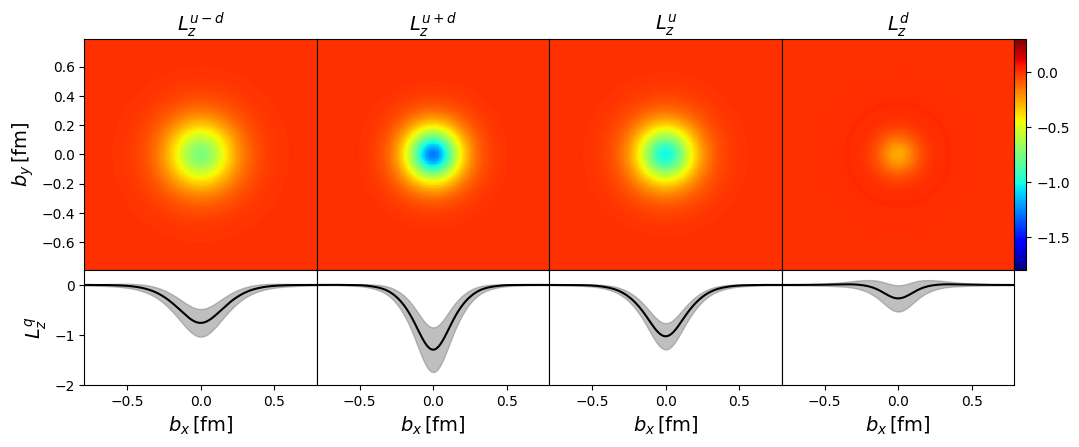

In [4]:
plot_fourier_transform_quark_orbital_angular_momentum(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",Delta_max=7,vmin = -1.8, vmax = .3,ymin=-2)

In [6]:
l_u_minus_d, l_u_minus_d_plus ,l_u_minus_d_minus = orbital_angular_momentum(0,2)
l_u_plus_d, l_u_plus_d_plus ,l_u_plus_d_minus = orbital_angular_momentum(0,2,moment_type="non_singlet_isoscalar")
l_s, _ ,_ = orbital_angular_momentum(0,2,moment_type="singlet")
l_u = (l_u_minus_d + l_u_plus_d)/2
l_d = (l_u_plus_d - l_u_minus_d)/2
l_u_plus = np.sqrt(l_u_minus_d_plus**2+l_u_plus_d_plus**2)/2
l_u_minus = np.sqrt(l_u_minus_d_minus**2+l_u_plus_d_minus**2)/2
# print(l_u_minus_d_plus,l_u_minus_d_minus)
# print(l_u_plus_d_plus,l_u_plus_d_minus)
print(l_u_plus_d,l_u_plus_d_plus,l_u_plus_d_minus)
print(l_u_minus_d,l_u_minus_d_plus,l_u_minus_d_minus)
print(l_u,l_d,l_s)
print(l_u_plus,l_u_minus)
# print(l_u+l_d+l_s)

-0.03515109816975892 0.06029649825648719 0.05994383876564187
-0.219103215838246 0.1182642498189208 0.11545418706579208
-0.12712715700400246 0.09197605883424353 0.0152597925474197
0.06637412991374476 0.06504408719665489


In [4]:
s_u_minus_d, s_u_minus_d_plus, s_u_minus_d_minus = quark_helicity(0,2,moment_type="non_singlet_isovector")
s_u_plus_d, s_u_plus_d_plus, s_u_plus_d_minus = quark_helicity(0,2,moment_type="non_singlet_isoscalar")
s_s, s_s_plus, s_s_minus= quark_helicity(0,2,moment_type="singlet")
s_g, s_g_plus, s_g_minus = gluon_helicity(0,2)
s_u = (s_u_plus_d+s_u_minus_d)/2
s_u_plus = np.sqrt(s_u_minus_d_plus**2+s_u_plus_d_plus**2)/2
s_u_minus = np.sqrt(s_u_minus_d_minus**2+s_u_plus_d_minus**2)/2
s_d = (s_u_plus_d-s_u_minus_d)/2
print(s_u_minus_d,s_u_minus_d_minus,s_u_minus_d_plus)
print(s_u_plus_d,s_u_plus_d_plus,s_u_plus_d_minus)
print(s_u,s_u_plus,s_u_minus)
print(s_d,s_u_plus,s_u_minus)
# print(s_s,s_s_plus,s_s_minus)
# print(s_g,s_g_plus,s_g_minus)
# print(s_u+s_d+s_s)
# print(s_g)

0.6399707831823318 0.08115649217992948 0.08115649217992948
0.2060500053406073 0.05619504848825929 0.05619504848825929
0.4230103942614696 0.049356508429863555 0.049356508429863555
-0.21696038892086225 0.049356508429863555 0.049356508429863555


In [5]:
c_u_minus_d, c_u_minus_d_plus, c_u_minus_d_minus = spin_orbit_corelation(0,2,moment_type="non_singlet_isovector")
c_u_plus_d, c_u_plus_d_plus, c_u_plus_d_minus = spin_orbit_corelation(0,2,moment_type="non_singlet_isoscalar")
c_u = (c_u_plus_d+c_u_minus_d)/2
c_u_plus = np.sqrt(c_u_minus_d_plus**2+c_u_plus_d_plus**2)/2
c_u_minus = np.sqrt(c_u_minus_d_minus**2+c_u_plus_d_minus**2)/2
c_d = (c_u_plus_d-c_u_minus_d)/2
print(c_u_minus_d,c_u_minus_d_minus,c_u_minus_d_plus)
print(c_u_plus_d,c_u_plus_d_plus,c_u_plus_d_minus)
print(c_u,c_u_plus,c_u_minus)
print(c_d,c_u_plus,c_u_minus)

-0.39844253802641905 0.17950598244725235 0.17043054856399925
-1.4625505084866472 0.17010833004615744 0.1792000831518223
-0.9304965232565332 0.12039872905778339 0.12682179183402717
-0.532053985230114 0.12039872905778339 0.12682179183402717


In [ ]:
def total_spin(t,mu):
    j_u_minus_d, j_u_minus_d_plus ,j_u_minus_d_minus= total_spin(t,mu)
    j_u_plus_d, j_u_plus_d_plus , j_u_plus_d_minus = total_spin(t,mu,moment_type="non_singlet_isoscalar")
    j_s, j_s_plus, j_s_minus = total_spin(t,mu,moment_type="singlet")
    j_g, j_g_plus ,j_g_minus = total_spin(t,mu,particle="gluon",moment_type="singlet")

    j_u = (j_u_minus_d+j_u_plus_d)/2
    j_d = (j_u_plus_d-j_u_minus_d)/2
    j_u_plus = np.sqrt((j_u_minus_d_plus)**2+(j_u_plus_d_plus)**2)/2
    j_u_minus = np.sqrt((j_u_minus_d_minus)**2+(j_u_plus_d_minus)**2)/2
    error_plus = np.sqrt(2*j_u_plus**2+j_s_plus**2+j_g_plus**2)
    error_minus= np.sqrt(2*j_u_minus**2+j_s_minus**2+j_g_minus**2)
    print(j_u + j_d + j_s + j_g, f'({error_plus})({error_minus})')

0.368205268227426 (0.0691794005656669)(0.0679402889812622)


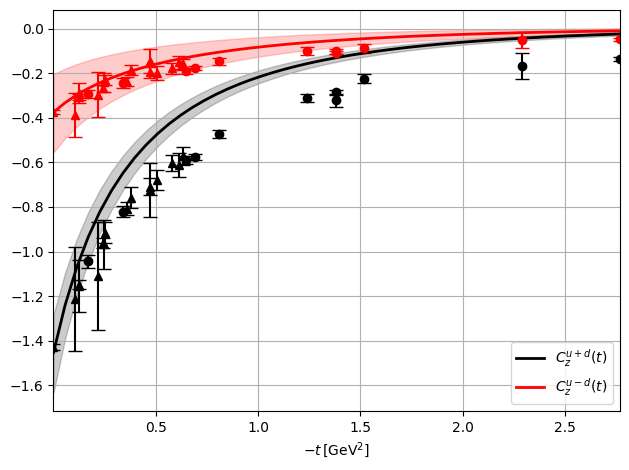

In [2]:
plot_spin_orbit_correlation()

Plots of conformal moments $\mathbb{G}(n,\eta,t)$ in momentum space

In [1]:
from stringy_gpds import plot_moments_on_grid

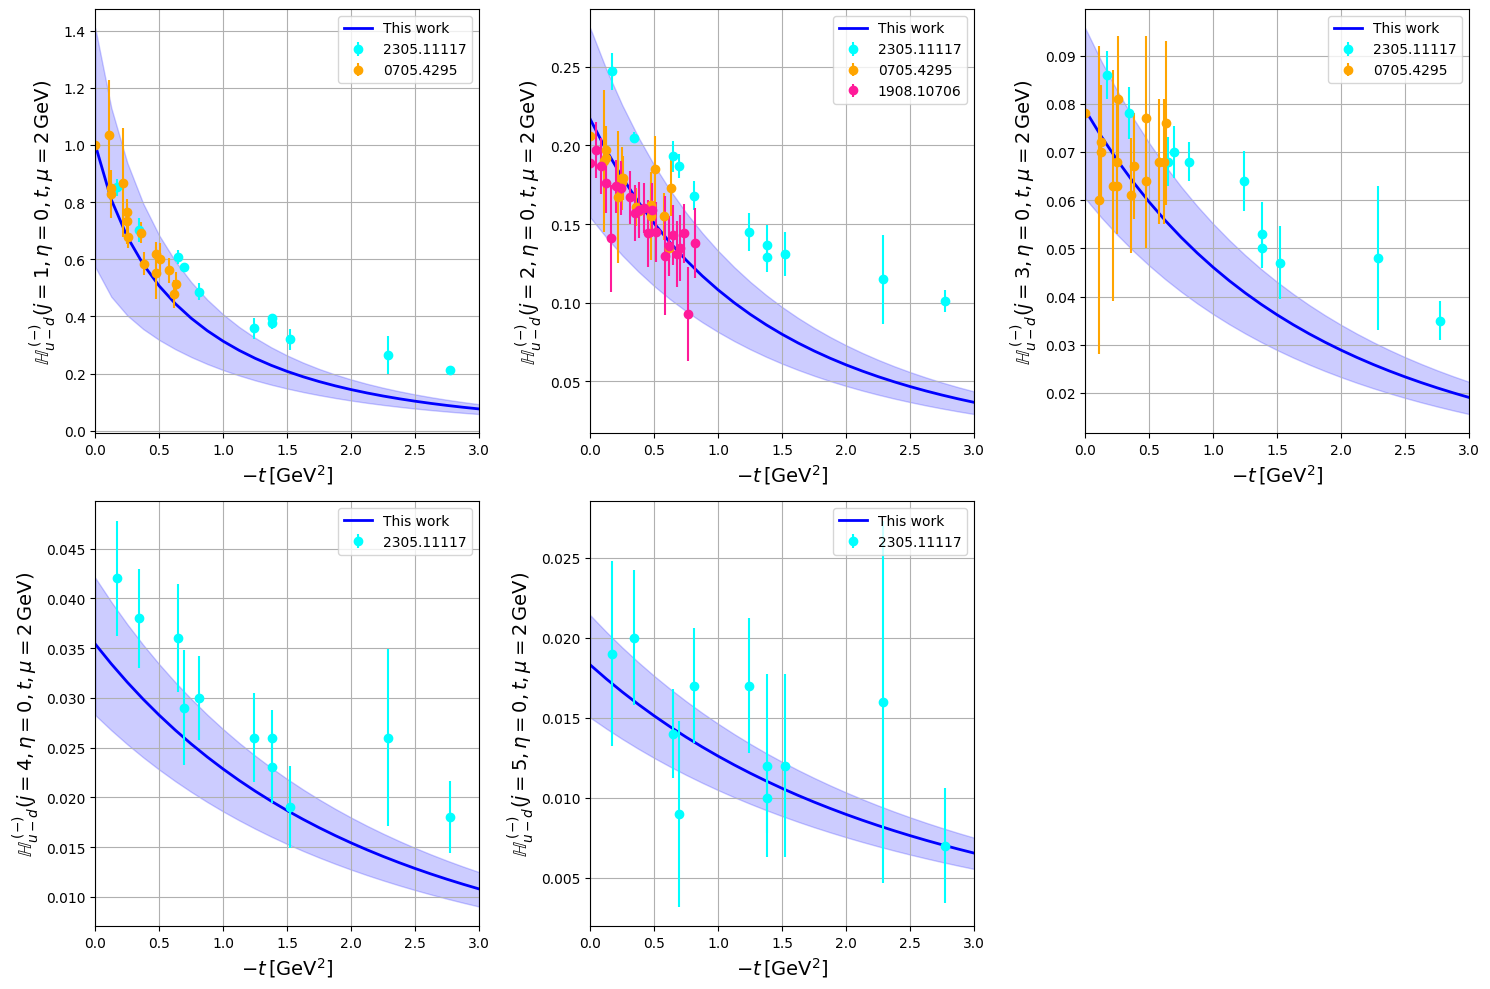

In [2]:
#non_singlet_isovector
y_label = "$\\mathbb{{H}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

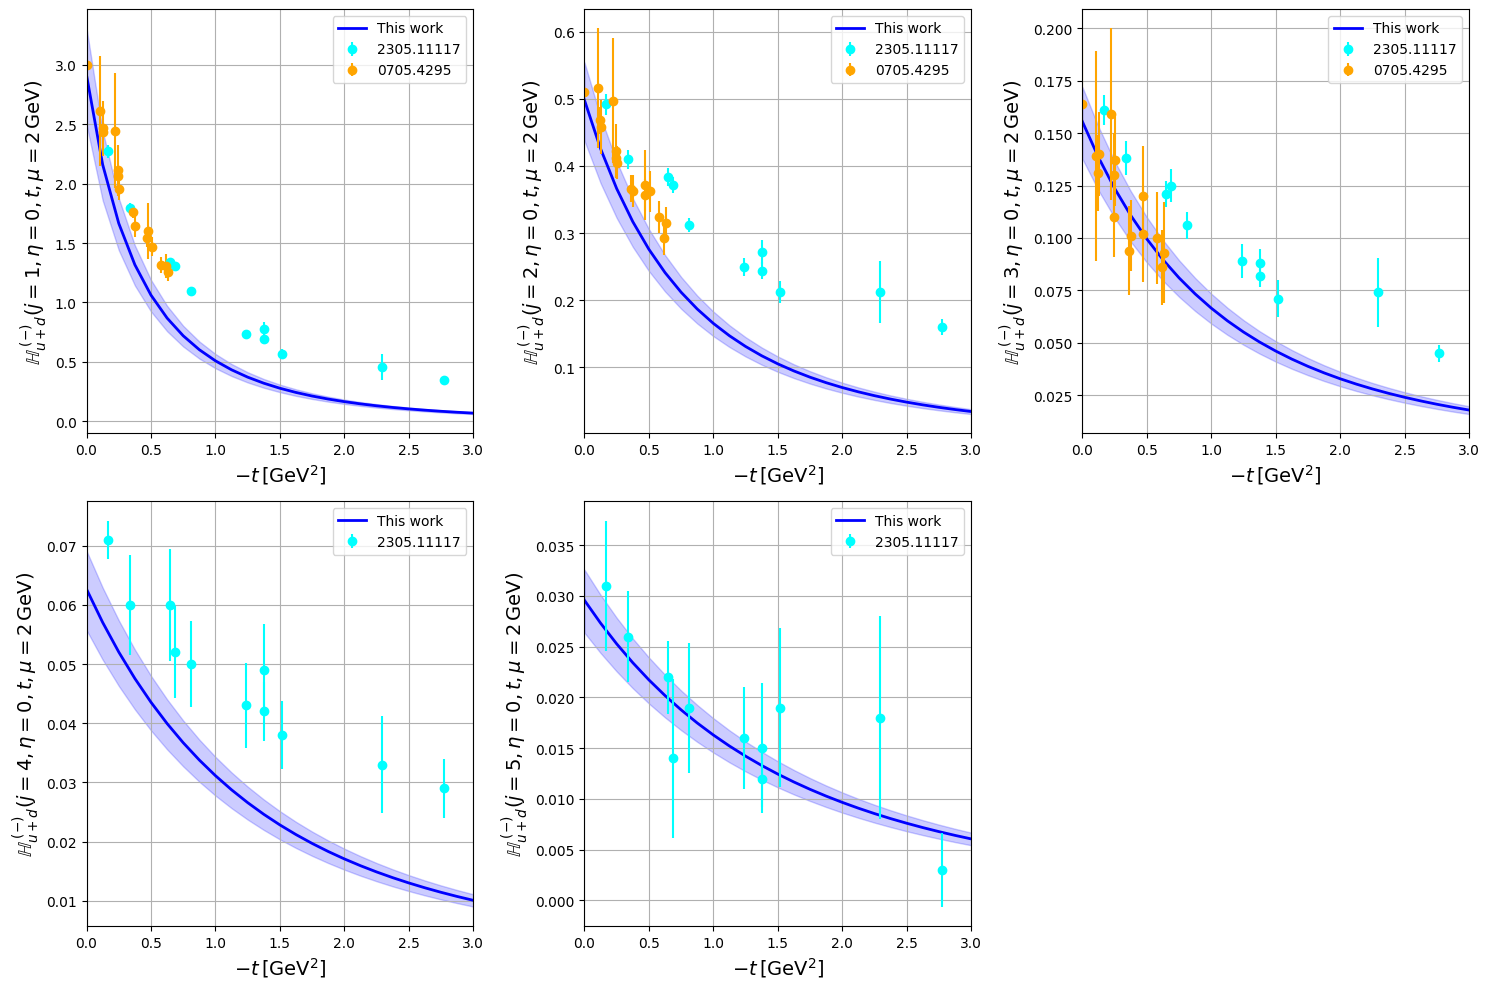

In [3]:
# non_singlet_isoscalar
y_label = "$\\mathbb{{H}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

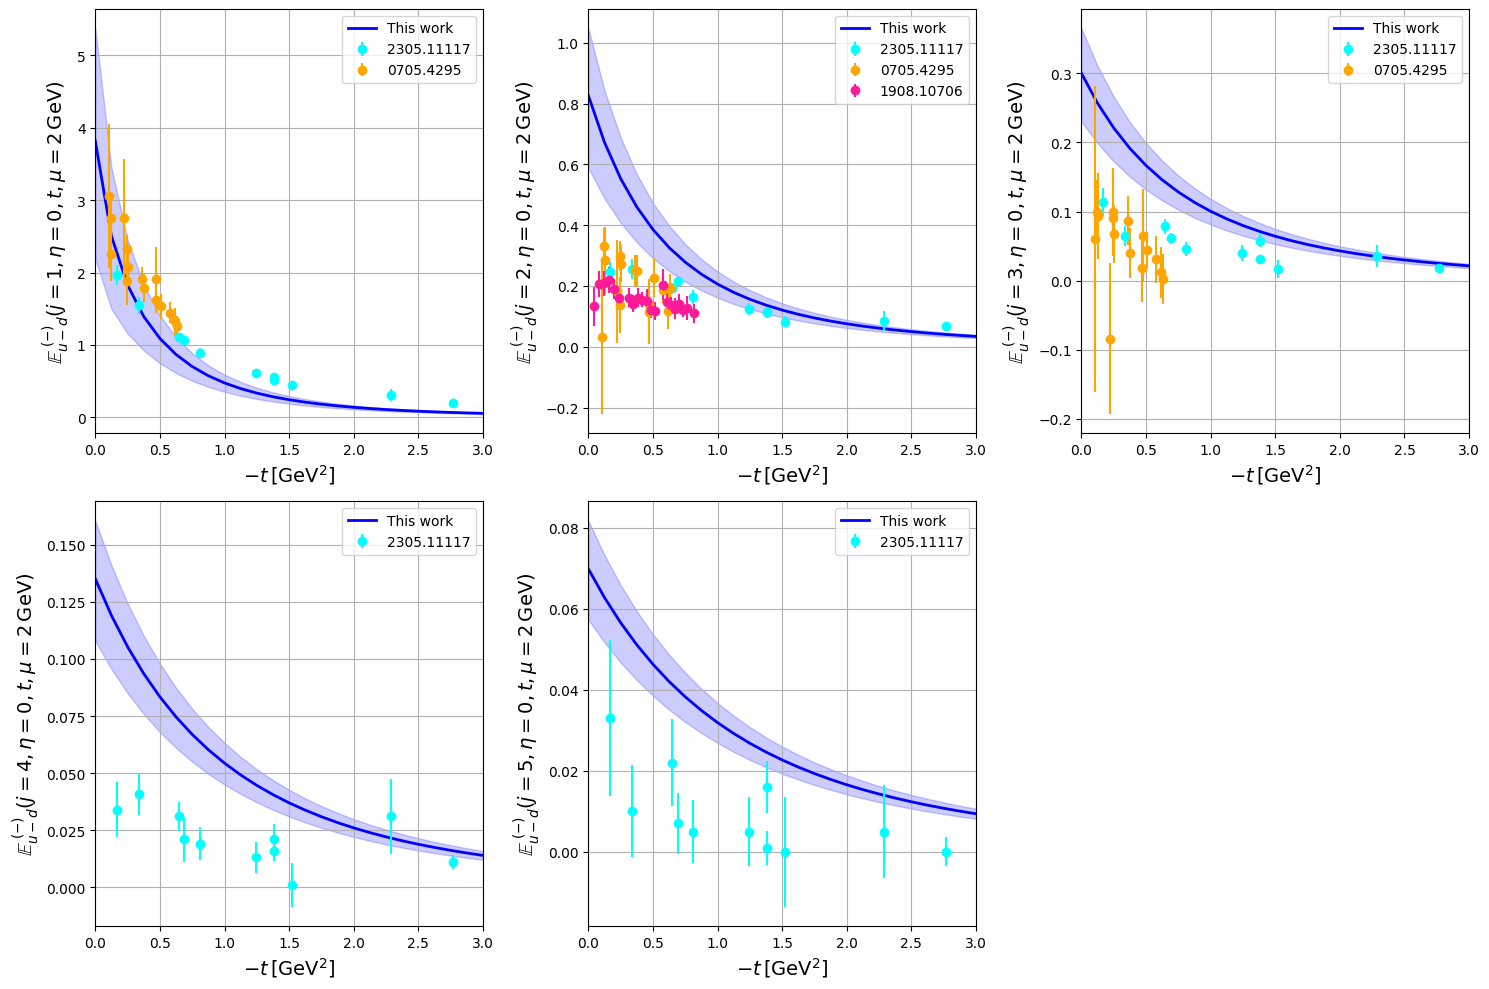

In [4]:
#non_singlet_isovector
y_label = "$\\mathbb{{E}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "B"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

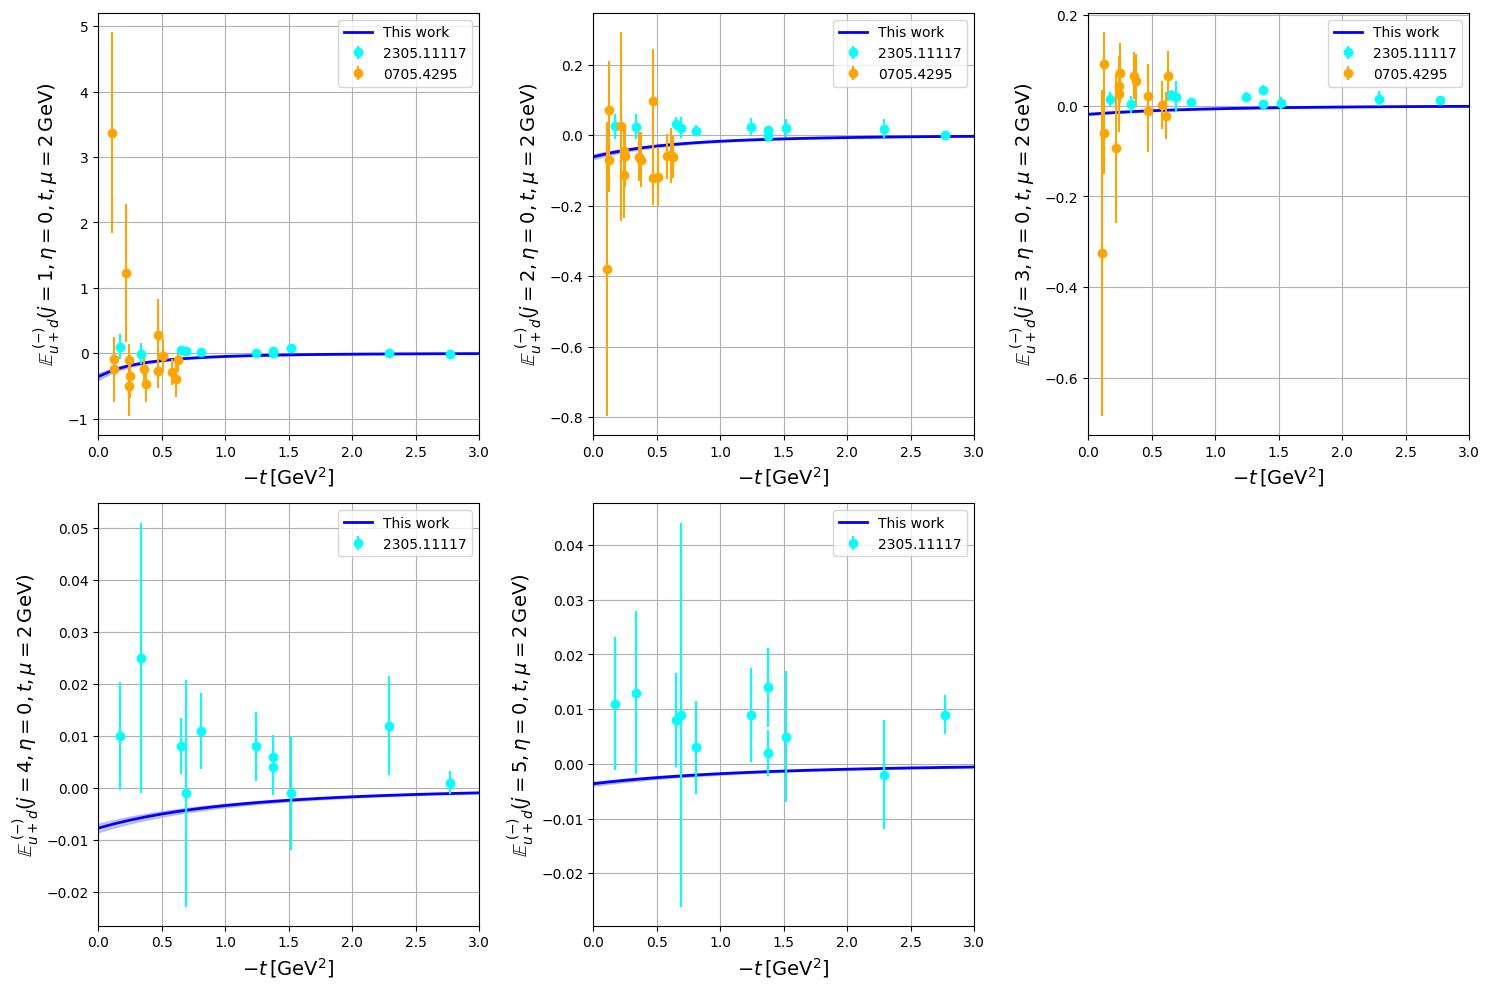

In [5]:
# non_singlet_isoscalar
y_label = "$\\mathbb{{E}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "B"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

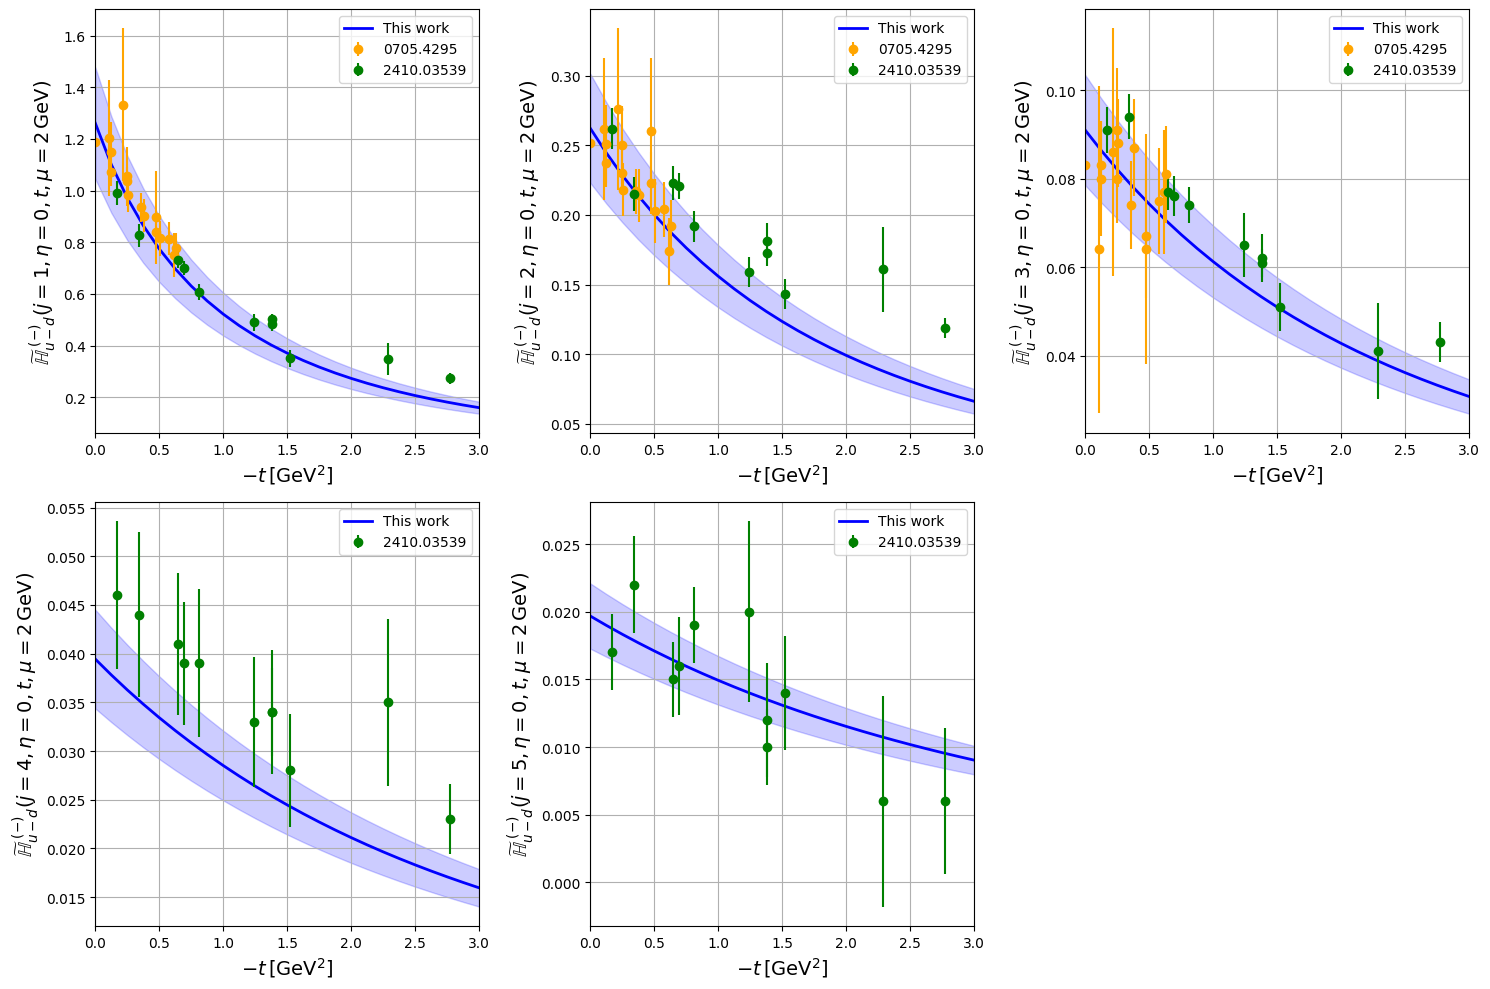

In [6]:
#non_singlet_isovector Axial
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

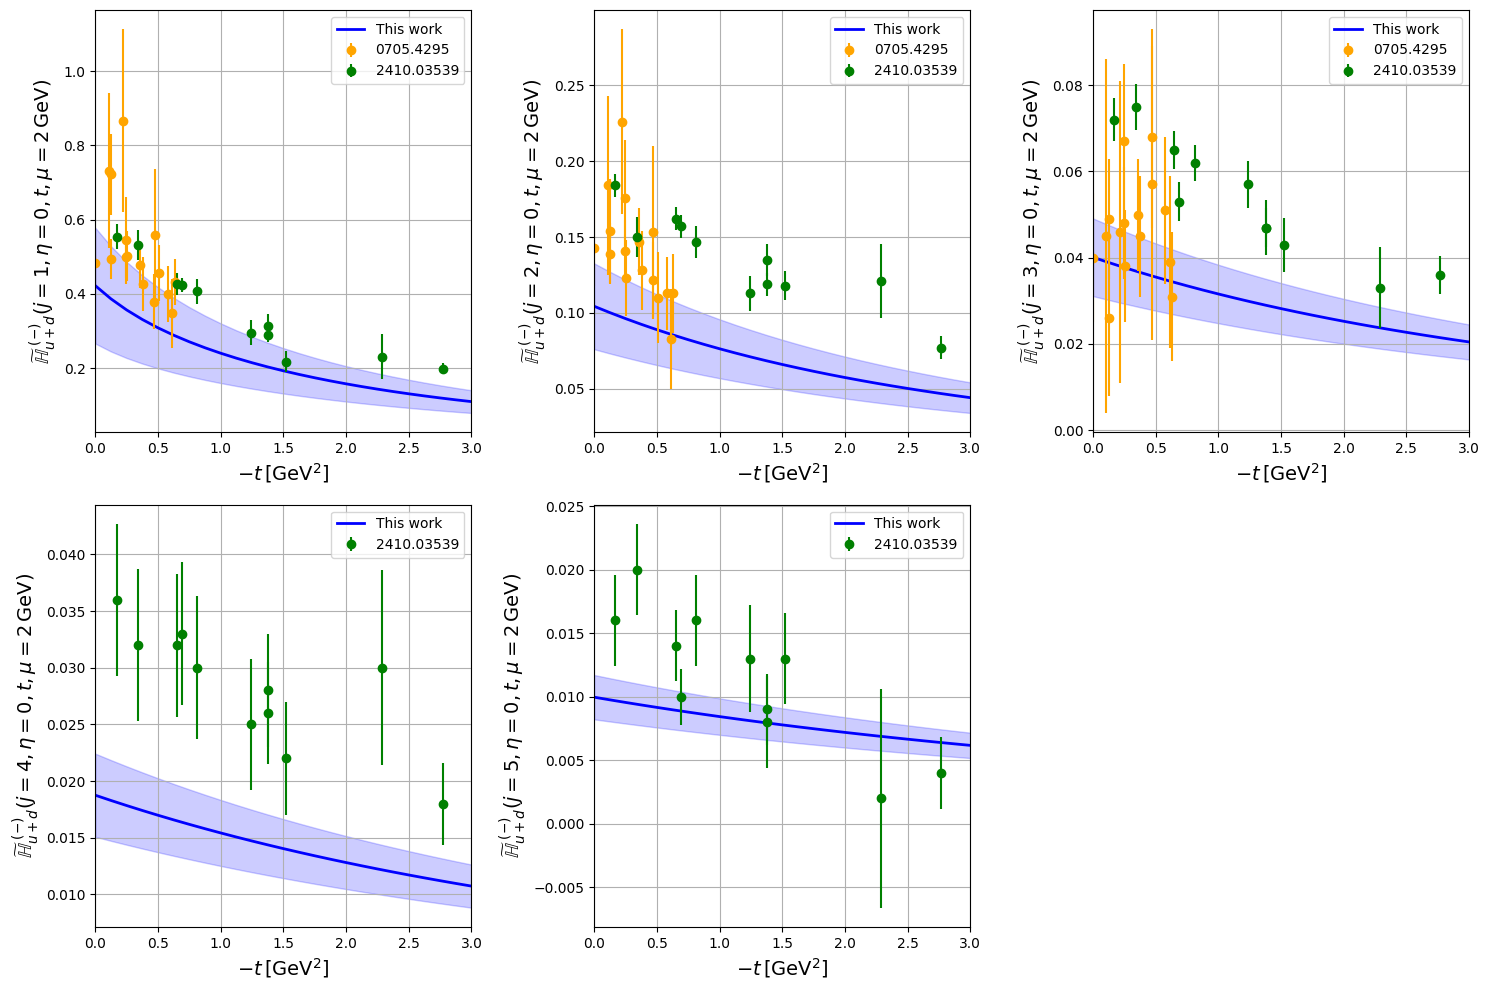

In [7]:
#non_singlet_isoscalar Axial
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

In [10]:
from stringy_gpds import evolve_conformal_moment
A0q = 0.51/evolve_conformal_moment(2,0,0,2,moment_type="singlet",particle="quark",evolution_order="NLO")
A0g = 0.501/evolve_conformal_moment(2,0,0,2,moment_type="singlet",particle="gluon",evolution_order="NLO")
print(A0q,A0g)

0.789898241118769 1.41389085809142


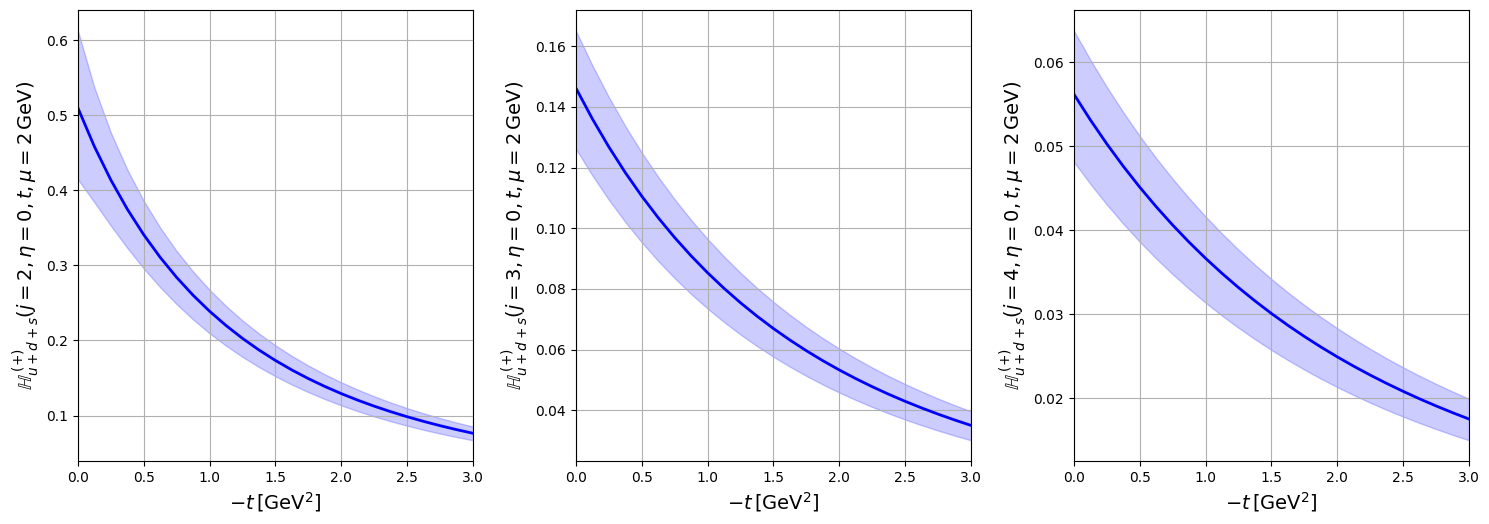

In [11]:
# Sea Quark singlet
y_label = "$\\mathbb{{H}}_{{u+d+s}}^{{\,\,(+)}}$"
moment_type = "singlet"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,A0q,"quark",moment_type, moment_label,"NLO",25)

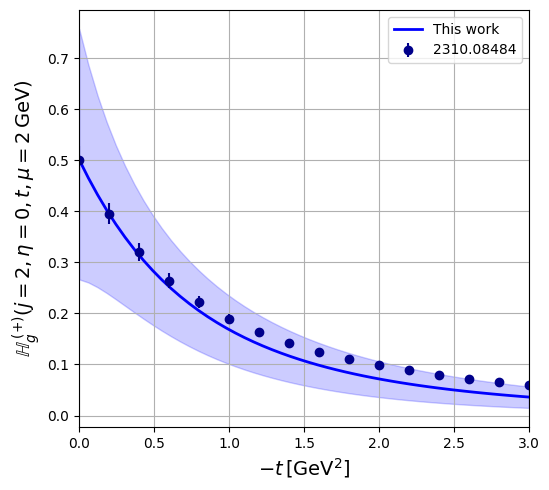

In [12]:
y_label = "$\\mathbb{{H}}_{{g}}^{{\,\,(+)}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(0,y_label,3,3,A0g,particle,moment_type,moment_label,evolution_order="NLO")

In [16]:
from stringy_gpds import evolve_singlet_D
D0g = -2.57/evolve_singlet_D(2,0,-1e-4,2,particle="gluon",evolution_order="NLO")

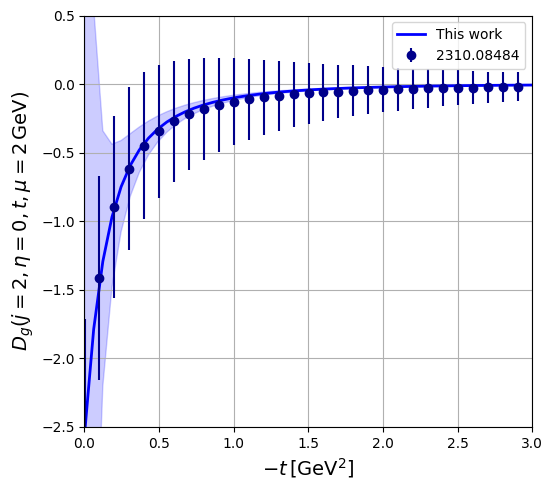

In [18]:
y_label = "$D_{{g}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(0,y_label,3,3,D0g,particle,moment_type,moment_label,D_term=True,y_0 = -2.5, y_1=.5,set_y_lim=True,evolution_order="NLO")

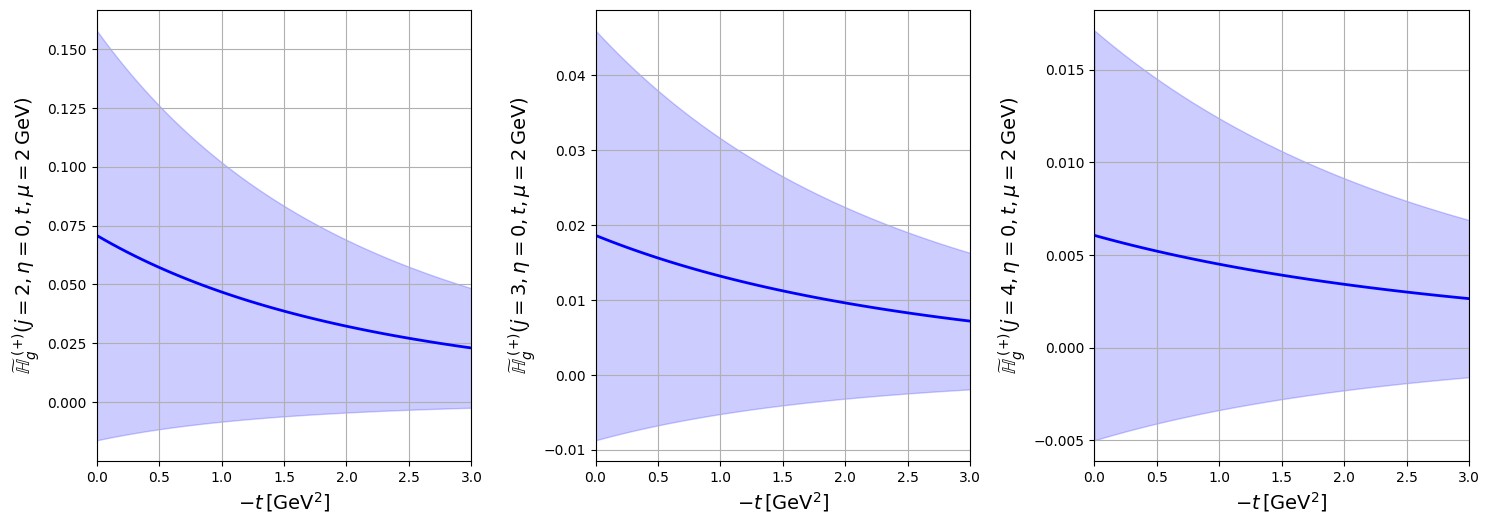

In [19]:
# Gluon singlet
y_label = "$\\widetilde{\\mathbb{{H}}}_{{g}}^{{\,\,(+)}}$"
moment_type = "singlet"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"gluon",moment_type, moment_label,evolution_order="NLO")

Plots of GPDs through Mellin-Barnes Integral

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.024125 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.022588 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.024590 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isoscalar_quark_GPD_Htilde.pdf


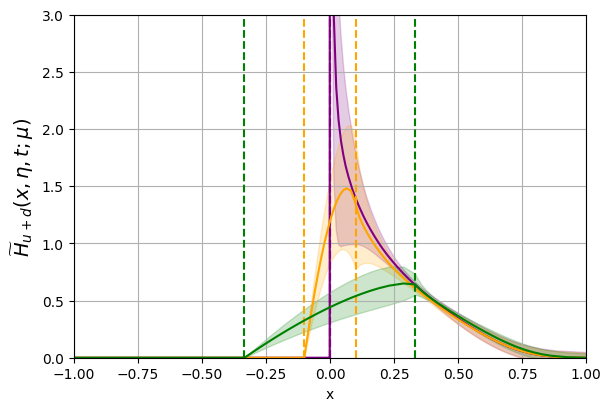

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isoscalar",gpd_label="Htilde",read_from_file=True, write_to_file=False,y_0=0,y_1=3,plot_legend=False)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.036008 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.036237 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.039108 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isoscalar_quark_GPD_E.pdf


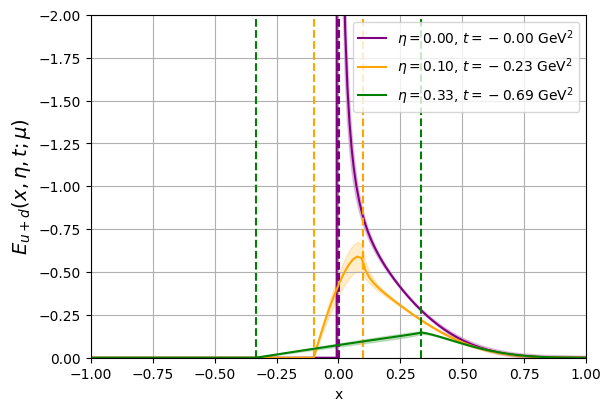

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isoscalar",gpd_label="E",read_from_file=True, write_to_file=False,y_0=0,y_1=-2,plot_legend=True)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.049581 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.038945 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.030953 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/GPD/NonSingletIsovectorquarkGPD_E.pdf


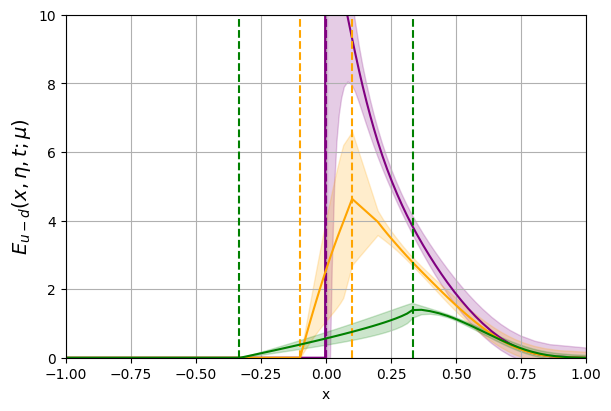

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isovector",gpd_label="E",read_from_file=True, write_to_file=False,y_0=0,y_1=10)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.037388 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.026723 seconds
Time for plot computation for parameters (eta,t) = ((0.1, -0.23)): 0.027040 seconds


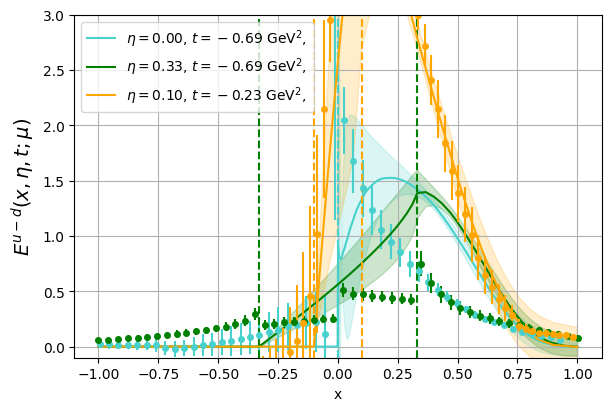

In [ ]:
plot_gpd_data(particle="quark",gpd_type="non_singlet_isovector",gpd_label="E",read_from_file=True,write_to_file=False,plot_legend=True)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.031749 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.033551 seconds
Time for plot computation for parameters (eta,t) = ((0.0, -0.39)): 0.033198 seconds


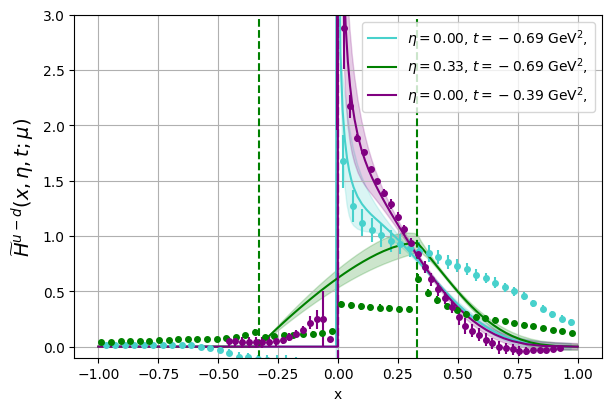

In [ ]:
plot_gpd_data(particle="quark",gpd_type="non_singlet_isovector",gpd_label="Htilde",read_from_file=True,write_to_file=False,plot_legend=True)